## With all our data collected into the five csv files our first order of buisness is to create time serie graphs that show how sales have changed over time and if there are particular moments in time where sales increased or decreased.  This notebook is organized starting with Batman, Avengers, Justice League, Spider-Man and X-Men in that order and containing all graphs for each franchise before moving on to the next.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
pd.plotting.register_matplotlib_converters()

## Batman

In [3]:
Batman = pd.read_csv("Batman_Final.csv")
Batman.head()

,File,Date,Rank,Comic-book_Title,Issue,Price,Publisher,Units_Sold,Writer,Rating,Movie_Title,Box_Office_Start,Box_Office_End,Worldwide_Box_Office,Metascore,User_Score
0,1997-04.csv,1997-04,46,Batman,543,1.95,DC,59706,Doug Moench,NaN,Batman,6/23/1989,12/1/1989,"$411,348,924.00",69.0,8.3
1,1997-05.csv,1997-05,31,Batman,544,1.95,DC,58451,Doug Moench,NaN,Batman Returns,6/18/1992,10/22/1992,"$266,824,291.00",68.0,7.6
2,1997-06.csv,1997-06,33,Batman,545,1.95,DC,57641,Doug Moench,NaN,Batman Forever,6/16/1995,10/27/1995,"$336,529,144.00",51.0,6.4
3,1997-07.csv,1997-07,38,Batman,546,1.95,DC,56074,Doug Moench,NaN,Batman & Robin,6/20/1997,9/12/1997,"$238,317,814.00",28.0,5.7
4,1997-08.csv,1997-08,40,Batman,547,1.95,DC,58652,Doug Moench,NaN,Catwoman,7/23/2004,10/15/2004,"$82,145,379.00",27.0,2.7


In [4]:
Batman['Date'] = pd.to_datetime(Batman['Date'], format="%Y/%m")

In [5]:
Batman2 = Batman[["Date", "Units_Sold"]]
Batman2.head()

,Date,Units_Sold
0,1997-04-01,59706
1,1997-05-01,58451
2,1997-06-01,57641
3,1997-07-01,56074
4,1997-08-01,58652


In [6]:
Batman_sorted = Batman2.sort_values(["Date"])
Batman_sorted.head()

,Date,Units_Sold
0,1997-04-01,59706
309,1997-04-01,55389
1,1997-05-01,58451
310,1997-06-01,53416
2,1997-06-01,57641


In [7]:
Batman_sorted.set_index("Date", inplace=True)
Batman_sorted.head()

,Units_Sold
Date,
1997-04-01,59706
1997-04-01,55389
1997-05-01,58451
1997-06-01,53416
1997-06-01,57641


In [8]:
Batman3 = Batman[Batman['Comic-book_Title'] == "Batman"]
Batman3 = Batman3[["Date", "Units_Sold"]]
Batman3.set_index("Date", inplace=True)
Batman3.head()

,Units_Sold
Date,
1997-04-01,59706
1997-05-01,58451
1997-06-01,57641
1997-07-01,56074
1997-08-01,58652


In [9]:
Batman4 = Batman[Batman['Comic-book_Title'] == "Detective Comics"]
Batman4 = Batman4[["Date", "Units_Sold"]]
Batman4.set_index("Date", inplace=True)
Batman4.head()

,Units_Sold
Date,
1997-04-01,55389
1997-06-01,53416
1997-07-01,51212
1997-08-01,51432
1997-09-01,50352


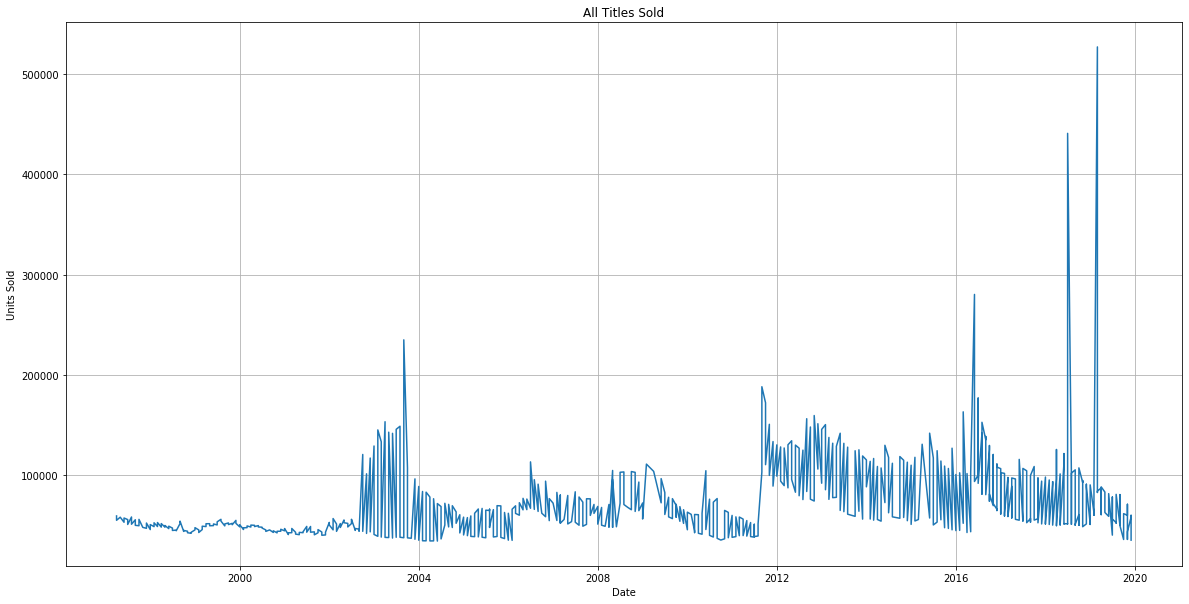

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Batman_sorted)
plt.show()

## Batman has two main titles consistently releasing every month with no cancellations Batman and Detective Comics with Batman almost always being the higher selling to Detective.  When we look at book titles over time the graph shows the up and down trend every month which is misleading since it is one title being a higher seller than the other. 

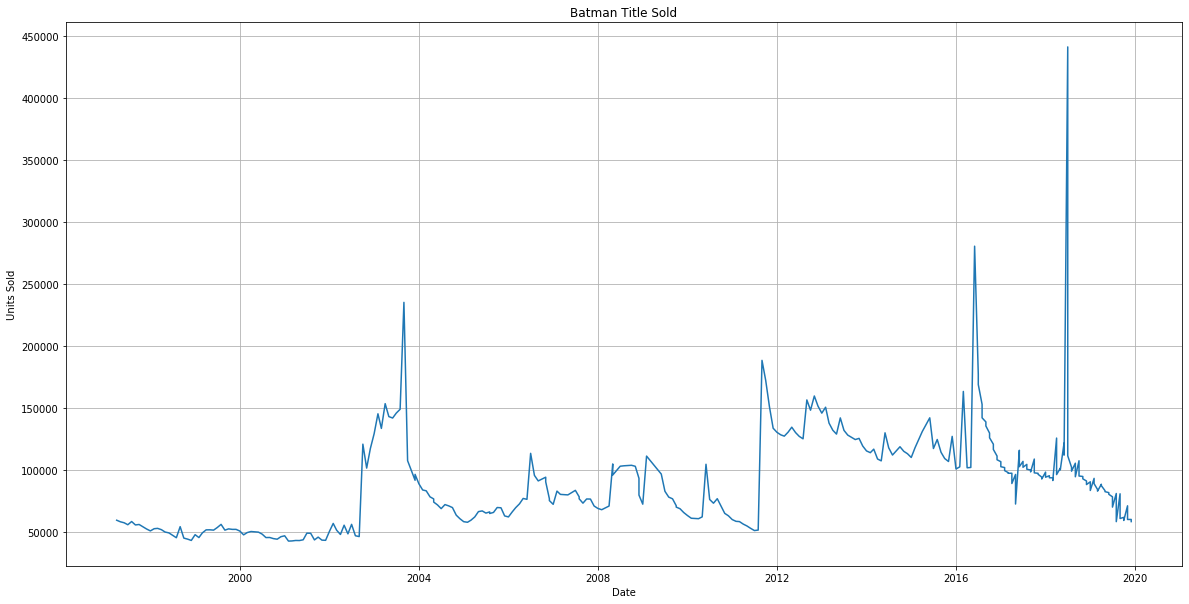

In [11]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Batman Title Sold')
plt.grid(True)
plt.plot(Batman3)
plt.show()

## Looking at just one title gives a clearer picture with big spikes occuring with new writers and relaunches that will steadily decline until a change is made.  The couple of times sales were huge >150000 it would't be enough to sustain these sales, it is readily apparent why comic publishers keep relaunching titles to get these huge sales.

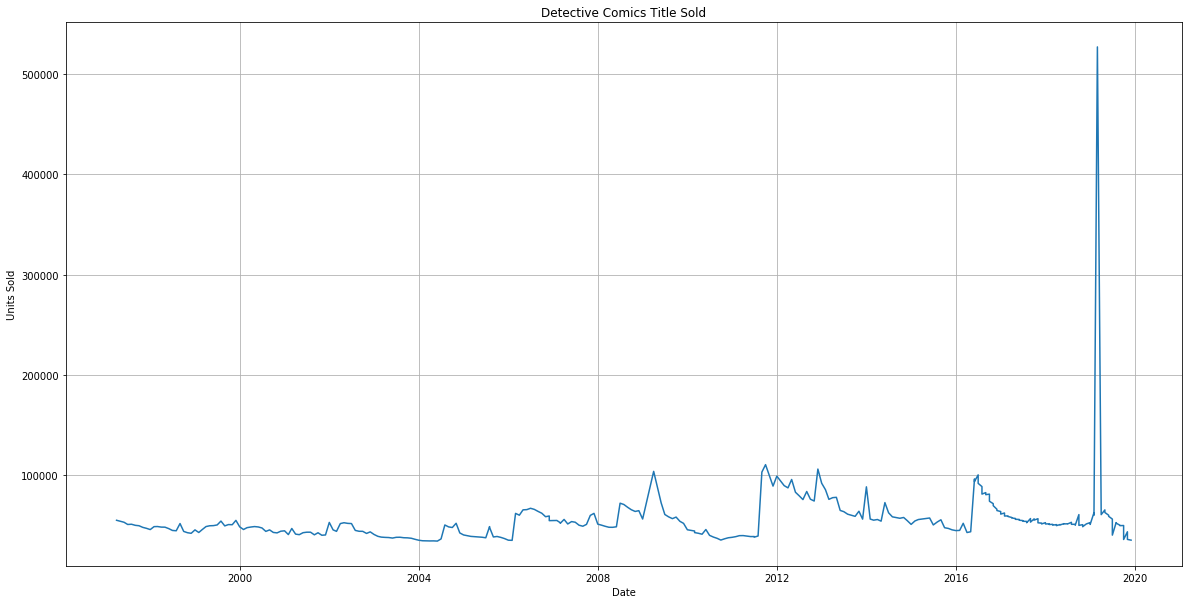

In [12]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Detective Comics Title Sold')
plt.grid(True)
plt.plot(Batman4)
plt.show()

## Batman sold more but Detective is the more consistent of the two with the only big spike due to landmark issue 1000 which didnt help sales after the issues as continued the downward trend of sales.

In [13]:
Batman_writers = Batman.groupby('Writer').filter(lambda x: x['Writer'].count()>9)
Batman_writers = Batman_writers.groupby(['Writer'])['Units_Sold'].mean()
Batman_writers

Writer
Andersen Gabrych     45411.058824
Brian Buccellato     56941.461538
Chuck Dixon          48106.840000
Doug Moench          53643.941176
Ed Brubaker          44771.567568
Grant Morrison       87065.464286
Greg Rucka           50631.647059
James Robinson       61721.500000
James Tynion IV      63740.653061
Jeph Loeb           143104.500000
John Layman          72913.294118
Jordan Gorfinkel     45091.833333
Judd Winick          70329.181818
Paul Dini            59459.160000
Peter J. Tomasi      67669.833333
Scott Snyder        113237.111111
Tom King            104731.674699
Tony Daniel          75245.629630
Name: Units_Sold, dtype: float64

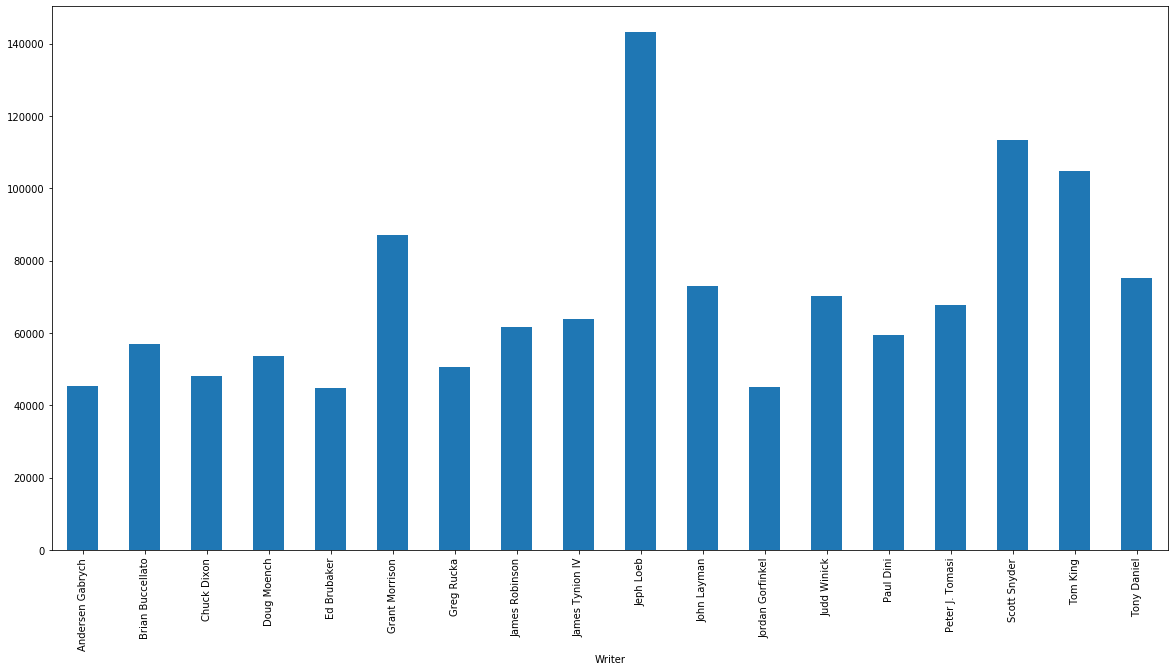

In [14]:
plt.figure(figsize=(20,10))
Batman_writers.plot(kind='bar')

## Next we are looking at the writers of these comics who had at least 10 issues to their credit to see the impact that these writers had on sales.  There have been many different writers and it is easy to tell which writers from a sales perspective that stand out and interestingly the two most recent authors of the Batman series are amoung the highest.

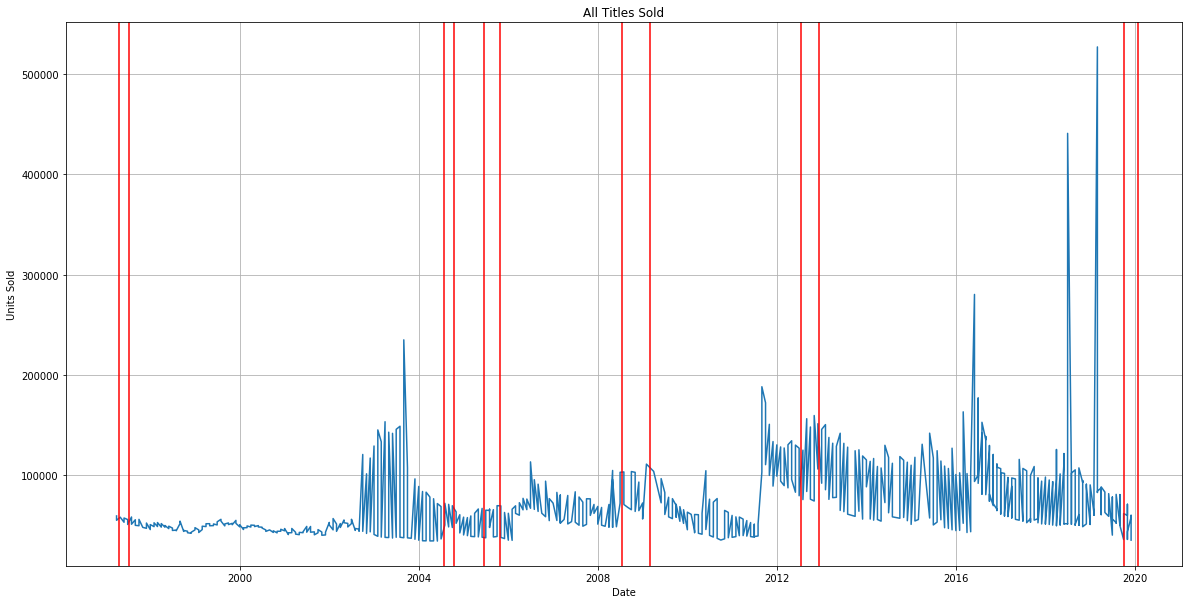

In [15]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Movie Impact')
plt.grid(True)
plt.plot(Batman_sorted)
plt.axvline(pd.Timestamp('1997-04-20'),color='r')
plt.axvline(pd.Timestamp('1997-07-12'),color='r')
plt.axvline(pd.Timestamp('2004-07-23'),color='r')
plt.axvline(pd.Timestamp('2004-10-15'),color='r')
plt.axvline(pd.Timestamp('2005-06-15'),color='r')
plt.axvline(pd.Timestamp('2005-10-28'),color='r')
plt.axvline(pd.Timestamp('2008-07-18'),color='r')
plt.axvline(pd.Timestamp('2009-02-27'),color='r')
plt.axvline(pd.Timestamp('2012-07-20'),color='r')
plt.axvline(pd.Timestamp('2012-12-07'),color='r')
plt.axvline(pd.Timestamp('2019-10-04'),color='r')
plt.axvline(pd.Timestamp('2020-01-24'),color='r')
plt.show()

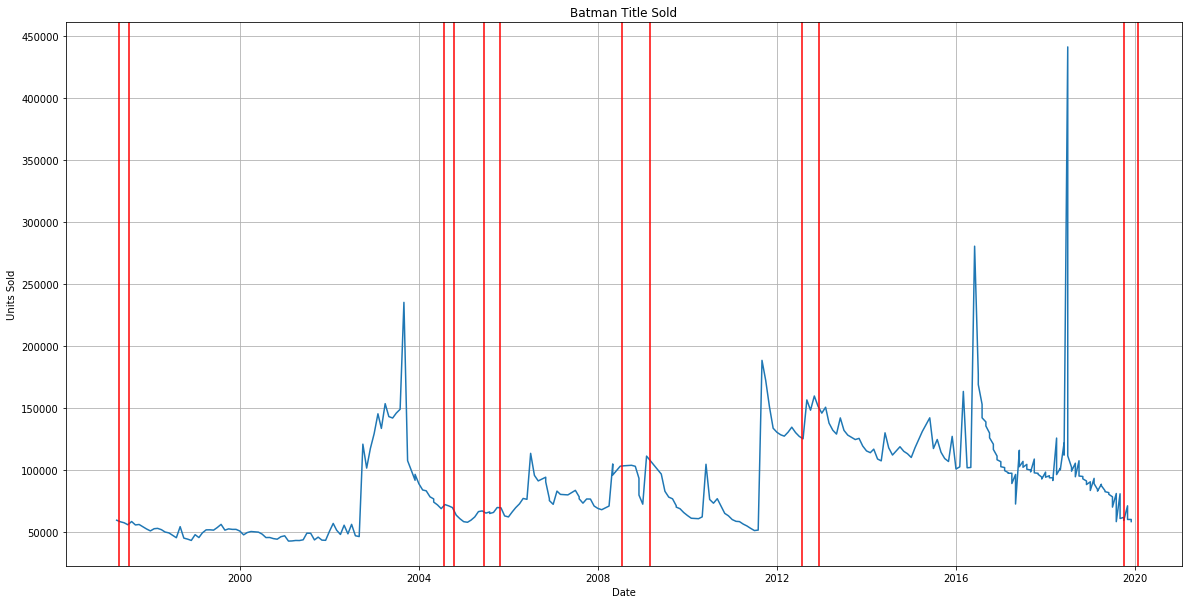

In [88]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Batman Movie Impact')
plt.grid(True)
plt.plot(Batman3)
plt.axvline(pd.Timestamp('1997-04-20'),color='r')
plt.axvline(pd.Timestamp('1997-07-12'),color='r')
plt.axvline(pd.Timestamp('2004-07-23'),color='r')
plt.axvline(pd.Timestamp('2004-10-15'),color='r')
plt.axvline(pd.Timestamp('2005-06-15'),color='r')
plt.axvline(pd.Timestamp('2005-10-28'),color='r')
plt.axvline(pd.Timestamp('2008-07-18'),color='r')
plt.axvline(pd.Timestamp('2009-02-27'),color='r')
plt.axvline(pd.Timestamp('2012-07-20'),color='r')
plt.axvline(pd.Timestamp('2012-12-07'),color='r')
plt.axvline(pd.Timestamp('2019-10-04'),color='r')
plt.axvline(pd.Timestamp('2020-01-24'),color='r')
plt.show()

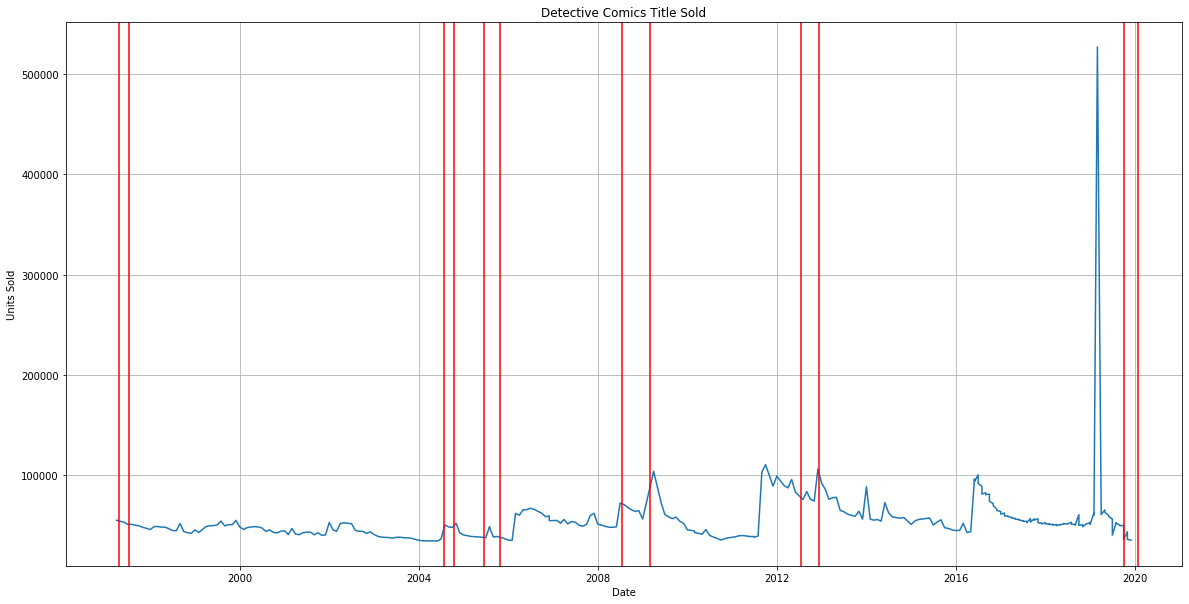

In [89]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Detective Comics Movie Impact')
plt.grid(True)
plt.plot(Batman4)
plt.axvline(pd.Timestamp('1997-04-20'),color='r')
plt.axvline(pd.Timestamp('1997-07-12'),color='r')
plt.axvline(pd.Timestamp('2004-07-23'),color='r')
plt.axvline(pd.Timestamp('2004-10-15'),color='r')
plt.axvline(pd.Timestamp('2005-06-15'),color='r')
plt.axvline(pd.Timestamp('2005-10-28'),color='r')
plt.axvline(pd.Timestamp('2008-07-18'),color='r')
plt.axvline(pd.Timestamp('2009-02-27'),color='r')
plt.axvline(pd.Timestamp('2012-07-20'),color='r')
plt.axvline(pd.Timestamp('2012-12-07'),color='r')
plt.axvline(pd.Timestamp('2019-10-04'),color='r')
plt.axvline(pd.Timestamp('2020-01-24'),color='r')
plt.show()

# Finally we are looking at Batman movies that released during this time and the effect that they had on their comic book series.  It is difficult to see the effect by looking at both titles at the same time so we are also looking at both titles separately to see a clearer picture.  The results show that in the months leading up to the release there are usually higher sales and when the movie releases it shows a slight downward trend.  What is interesting is the first week the movie is released there is no huge spike rather the interest from the public starts much earlier and gradually decreases until the movie leaves the theater. 

## Avengers

In [16]:
Avengers = pd.read_csv("Avengers_Final.csv")
Avengers.head()

,File,Date,Rank,Comic-book_Title,Issue,Price,Publisher,Units_Sold,Writer,Rating,Movie_Title,Box_Office_Start,Box_Office_End,Worldwide_Box_Office,Metascore,User_Score
0,2015-11.csv,2015-11,6,All New All Different Avengers,1,4.99,Marvel,128570,Mark Waid,6.7,Iron Man,5/2/2008,9/27/2008,"585,071,547.00",79.0,8.5
1,2015-12.csv,2015-12,23,All New All Different Avengers,2,3.99,Marvel,67154,Mark Waid,6.5,The Incredible Hulk,6/13/2008,8/29/2008,"265,573,859.00",61.0,7.2
2,2016-01.csv,2016-01,18,All New All Different Avengers,3,3.99,Marvel,57584,Mark Waid,6.7,Iron Man 2,5/7/2010,8/13/2010,"621,156,389.00",57.0,6.5
3,2016-01.csv,2016-01,19,All New All Different Avengers,4,3.99,Marvel,57114,Mark Waid,7.2,Thor,5/6/2011,8/19/2011,"449,326,618.00",57.0,7.0
4,2016-02.csv,2016-02,20,All New All Different Avengers,5,3.99,Marvel,51740,Mark Waid,7.7,Captain America,7/22/2011,11/4/2011,"370,569,776.00",66.0,7.3


In [17]:
Avengers['Date'] = pd.to_datetime(Avengers['Date'], format="%Y/%m")

In [18]:
Avengers2 = Avengers[["Date", "Units_Sold"]]
Avengers2.head()

,Date,Units_Sold
0,2015-11-01,128570
1,2015-12-01,67154
2,2016-01-01,57584
3,2016-01-01,57114
4,2016-02-01,51740


In [19]:
Avengers_sorted = Avengers2.sort_values(["Date"])
Avengers_sorted.head()

,Date,Units_Sold
15,1997-04-01,120937
16,1997-05-01,107567
17,1997-06-01,114896
18,1997-07-01,110084
19,1997-08-01,114787


In [20]:
Avengers_sorted.set_index("Date", inplace=True)
Avengers_sorted.head()

,Units_Sold
Date,
1997-04-01,120937
1997-05-01,107567
1997-06-01,114896
1997-07-01,110084
1997-08-01,114787


In [21]:
Avengers3 = Avengers[Avengers['Comic-book_Title'] == "All New All Different Avengers"]
Avengers3 = Avengers3[["Date", "Units_Sold"]]
Avengers3.set_index("Date", inplace=True)
Avengers3.head()

,Units_Sold
Date,
2015-11-01,128570
2015-12-01,67154
2016-01-01,57584
2016-01-01,57114
2016-02-01,51740


In [22]:
Avengers4 = Avengers[Avengers['Comic-book_Title'] == "Avengers"]
Avengers4 = Avengers4[["Date", "Units_Sold"]]
Avengers4.set_index("Date", inplace=True)
Avengers4.head()

,Units_Sold
Date,
1997-04-01,120937
1997-05-01,107567
1997-06-01,114896
1997-07-01,110084
1997-08-01,114787


In [23]:
Avengers5 = Avengers[Avengers['Comic-book_Title'] == "New Avengers"]
Avengers5 = Avengers5[["Date", "Units_Sold"]]
Avengers5.set_index("Date", inplace=True)
Avengers5.head()

,Units_Sold
Date,
2004-12-01,240734
2005-01-01,153443
2005-02-01,149041
2005-03-01,154920
2005-04-01,162384


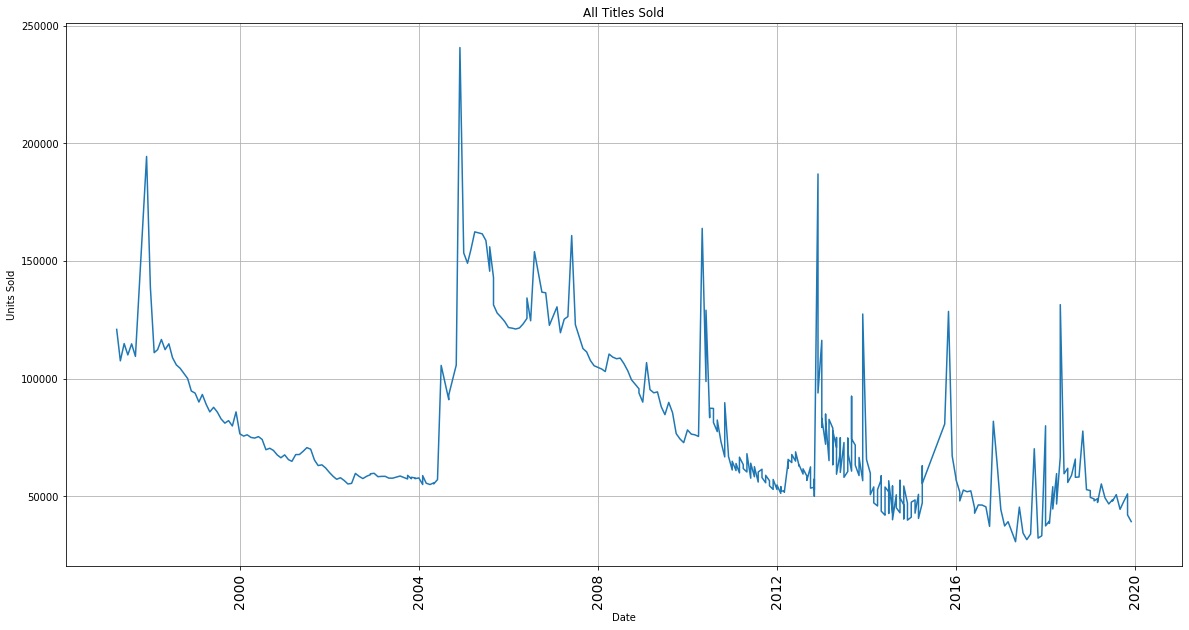

In [24]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Avengers_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Avengers is one of two titles that includes a number of titles in its umbrella with the so called Marvel Cinematic Universe being the big moneymaker on the movie side.  Just looking at comic sales we can see that sales have continually declined since its high around 2005 and despite the numerous relaunches that will sell high initially it will almost go back down to lower numbers.

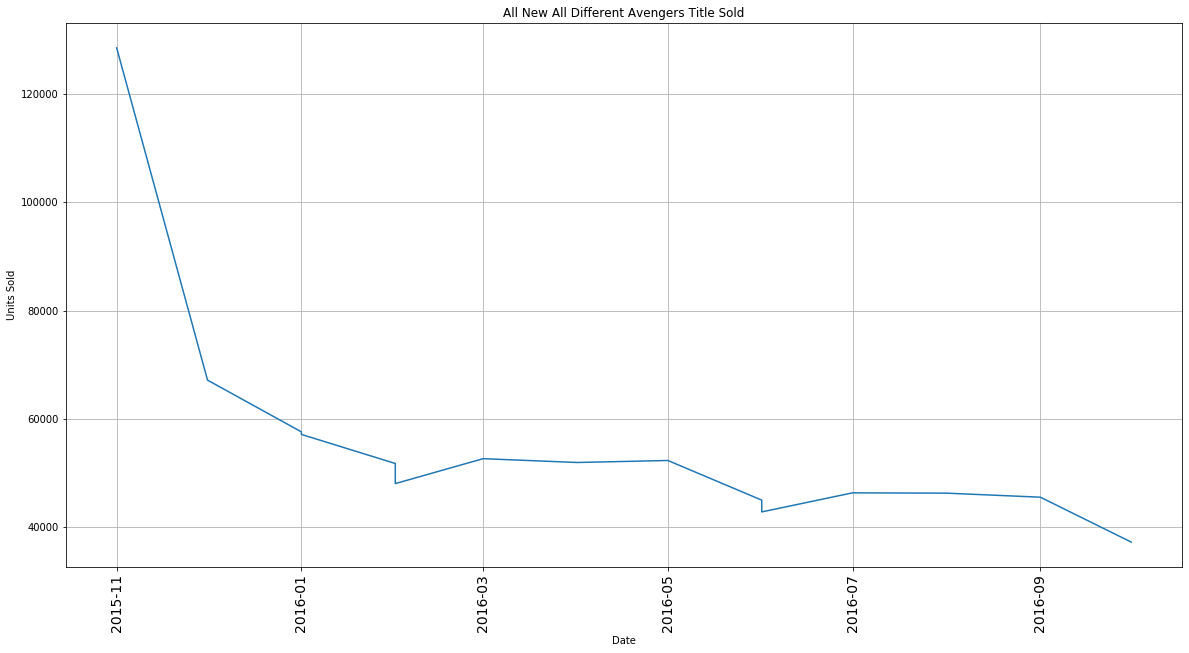

In [25]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All New All Different Avengers Title Sold')
plt.grid(True)
plt.plot(Avengers3)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## This is the weakest of the Avengers titles and despite being written by only one writer and high initial sales it quickly had poor sales that sustained over the period of a year.

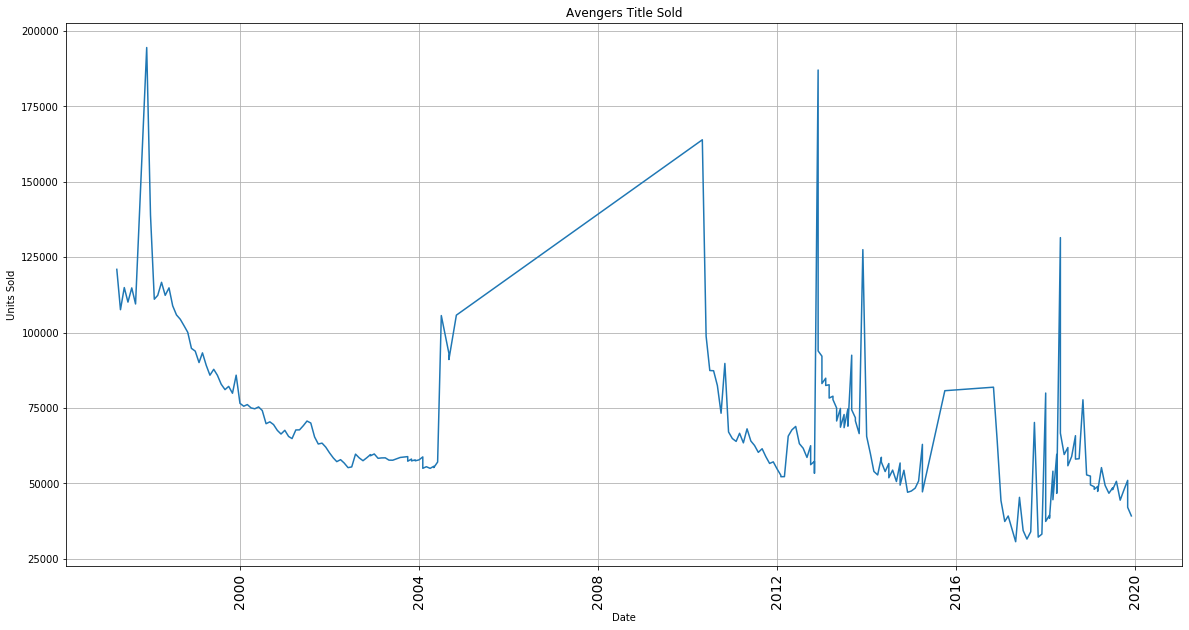

In [26]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Avengers Title Sold')
plt.grid(True)
plt.plot(Avengers4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## The longest running Avengers title that had two different gaps where it wasnt sold was at its peak in our earlier data and coincidentally written by the same author.  Relaunches helped the initial sales with the spikes we see but nothing sustainable.

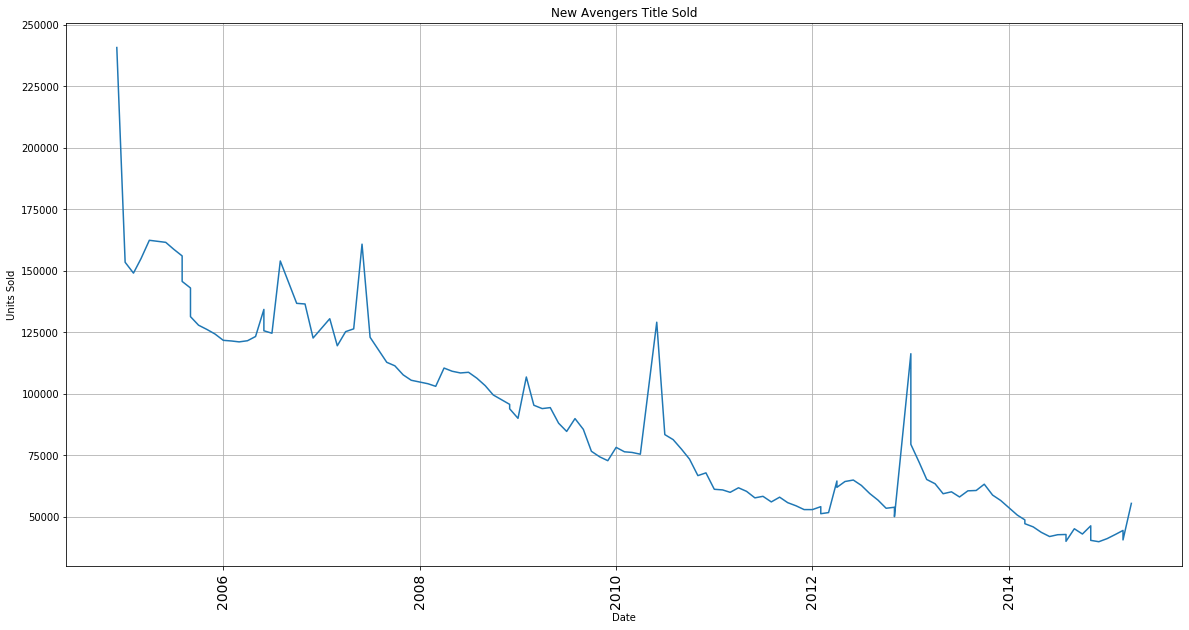

In [27]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('New Avengers Title Sold')
plt.grid(True)
plt.plot(Avengers5)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Yet another Avengers title where the initial was much higher than the ones following it and written by the same author.  Consistent downward trend and even the relaunches don't help the slipping sales.

In [28]:
Avengers_writers = Avengers.groupby('Writer').filter(lambda x: x['Writer'].count()>9)
Avengers_writers = Avengers_writers.groupby(['Writer'])['Units_Sold'].mean()
Avengers_writers

Writer
Brian Michael Bendis    90970.676471
Geoff Johns             58369.150000
Jason Aaron             55899.142857
Jonathan Hickman        63076.571429
Kurt Busiek             82244.259259
Mark Waid               49697.422222
Name: Units_Sold, dtype: float64

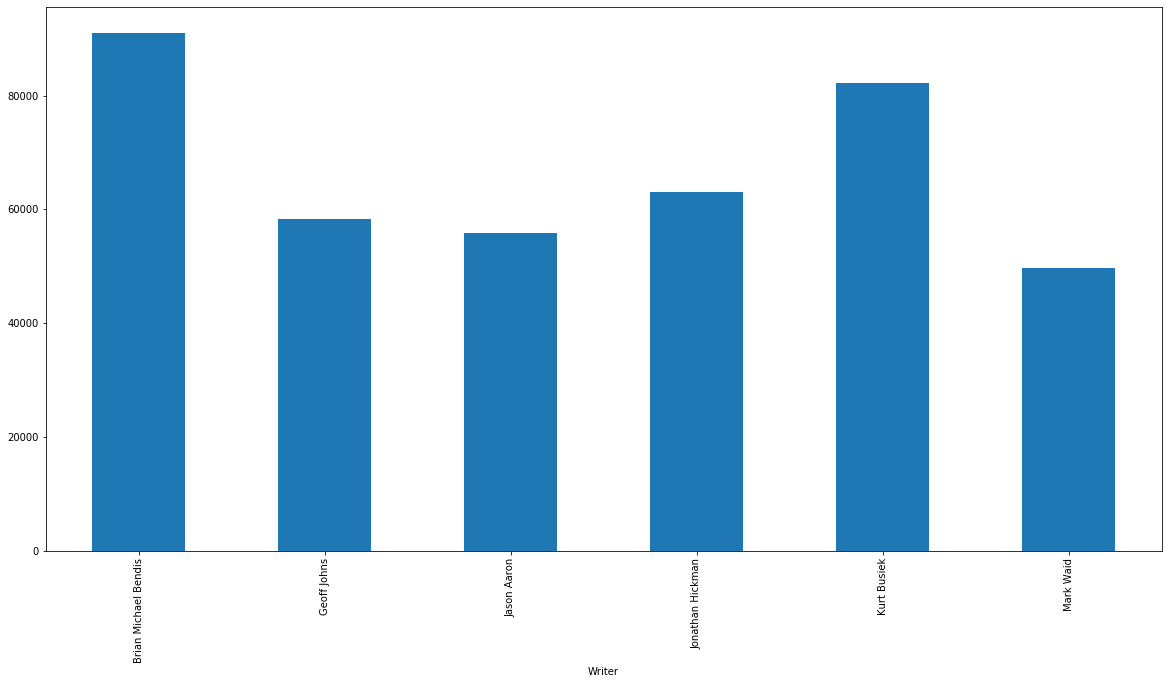

In [29]:
plt.figure(figsize=(20,10))
Avengers_writers.plot(kind='bar')

## Brian Michael Bendis is the difference maker here and even with him writing far more titles than anyone on the list he still has the highest average sales of any writer.

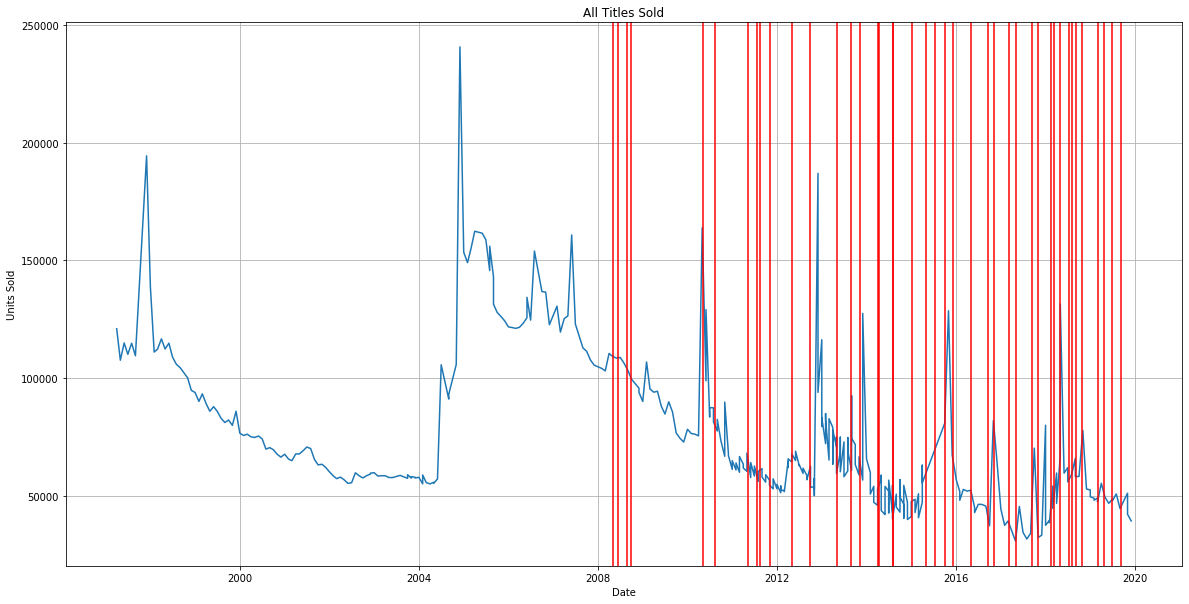

In [30]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Movie Impact')
plt.grid(True)
plt.plot(Avengers_sorted)
plt.axvline(pd.Timestamp('2008-05-02'),color='r')
plt.axvline(pd.Timestamp('2008-09-27'),color='r')
plt.axvline(pd.Timestamp('2008-06-13'),color='r')
plt.axvline(pd.Timestamp('2008-08-29'),color='r')
plt.axvline(pd.Timestamp('2010-05-07'),color='r')
plt.axvline(pd.Timestamp('2010-08-13'),color='r')
plt.axvline(pd.Timestamp('2011-05-06'),color='r')
plt.axvline(pd.Timestamp('2011-08-19'),color='r')
plt.axvline(pd.Timestamp('2011-07-22'),color='r')
plt.axvline(pd.Timestamp('2011-11-04'),color='r')
plt.axvline(pd.Timestamp('2012-05-04'),color='r')
plt.axvline(pd.Timestamp('2012-09-28'),color='r')
plt.axvline(pd.Timestamp('2013-05-03'),color='r')
plt.axvline(pd.Timestamp('2013-08-30'),color='r')
plt.axvline(pd.Timestamp('2013-11-08'),color='r')
plt.axvline(pd.Timestamp('2014-04-11'),color='r')
plt.axvline(pd.Timestamp('2014-04-04'),color='r')
plt.axvline(pd.Timestamp('2014-08-08'),color='r')
plt.axvline(pd.Timestamp('2014-08-01'),color='r')
plt.axvline(pd.Timestamp('2015-01-09'),color='r')
plt.axvline(pd.Timestamp('2015-05-01'),color='r')
plt.axvline(pd.Timestamp('2015-10-02'),color='r')
plt.axvline(pd.Timestamp('2015-07-17'),color='r')
plt.axvline(pd.Timestamp('2015-12-11'),color='r')
plt.axvline(pd.Timestamp('2016-05-06'),color='r')
plt.axvline(pd.Timestamp('2016-09-16'),color='r')
plt.axvline(pd.Timestamp('2016-11-04'),color='r')
plt.axvline(pd.Timestamp('2017-03-10'),color='r')
plt.axvline(pd.Timestamp('2017-05-05'),color='r')
plt.axvline(pd.Timestamp('2017-09-15'),color='r')
plt.axvline(pd.Timestamp('2017-11-03'),color='r')
plt.axvline(pd.Timestamp('2018-03-09'),color='r')
plt.axvline(pd.Timestamp('2018-02-16'),color='r')
plt.axvline(pd.Timestamp('2018-08-03'),color='r')
plt.axvline(pd.Timestamp('2018-04-27'),color='r')
plt.axvline(pd.Timestamp('2018-09-07'),color='r')
plt.axvline(pd.Timestamp('2018-07-09'),color='r')
plt.axvline(pd.Timestamp('2018-10-26'),color='r')
plt.axvline(pd.Timestamp('2019-03-08'),color='r')
plt.axvline(pd.Timestamp('2019-06-28'),color='r')
plt.axvline(pd.Timestamp('2019-04-26'),color='r')
plt.axvline(pd.Timestamp('2019-09-06'),color='r')
plt.show()

## This is the most confusing graph to follow since there are so many movies within the Marvel Cinematic Universe and even though sales from before the movies were released were much higher the effect of the movies can be observed by looking at sales before the movie enters the theatre and after it leaves.  We can see higher sales in the months leading up to the movie and lower sales at the end.  Since the movies are released so close together we dont have a big increase but the trend shows the impact these movies make on the sales.

## Justice League

In [31]:
Justice = pd.read_csv("Justice_Final.csv")
Justice.head()

,File,Date,Rank,Comic-book_Title,Issue,Price,Publisher,Units_Sold,Writer,Rating,Movie_Title,Box_Office_Start,Box_Office_End,Worldwide_Box_Office,Metascore,User_Score
0,1997-04.csv,1997-04,24,JLA,6,1.95,DC,98818,Grant Morrison,NaN,Man of Steel,6/13/2013,9/13/2013,"$667,999,518.00",55.0,7.5
1,1997-05.csv,1997-05,11,JLA,7,1.95,DC,103498,Grant Morrison,NaN,Batman v Superman,3/25/2016,6/10/2016,"$873,634,919.00",44.0,7.0
2,1997-06.csv,1997-06,11,JLA,8,1.95,DC,104030,Grant Morrison,NaN,Suicide Squad,8/5/2016,11/4/2016,"$746,059,887.00",40.0,6.0
3,1997-07.csv,1997-07,9,JLA,10,1.95,DC,104947,Grant Morrison,NaN,Wonder Woman,6/2/2017,11/3/2017,"$821,133,378.00",76.0,7.7
4,1997-07.csv,1997-07,10,JLA,9,1.95,DC,104403,Grant Morrison,NaN,Justice League,11/17/2017,3/9/2018,"$655,945,209.00",45.0,6.4


In [32]:
Justice['Date'] = pd.to_datetime(Justice['Date'], format="%Y/%m")

In [33]:
Justice2 = Justice[["Date", "Units_Sold"]]
Justice2.head()

,Date,Units_Sold
0,1997-04-01,98818
1,1997-05-01,103498
2,1997-06-01,104030
3,1997-07-01,104947
4,1997-07-01,104403


In [34]:
Justice_sorted = Justice2.sort_values(["Date"])
Justice_sorted.head()

,Date,Units_Sold
0,1997-04-01,98818
1,1997-05-01,103498
2,1997-06-01,104030
3,1997-07-01,104947
4,1997-07-01,104403


In [35]:
Justice_sorted.set_index("Date", inplace=True)
Justice_sorted.head()

,Units_Sold
Date,
1997-04-01,98818
1997-05-01,103498
1997-06-01,104030
1997-07-01,104947
1997-07-01,104403


In [36]:
Justice3 = Justice[Justice['Comic-book_Title'] == "JLA"]
Justice3 = Justice3[["Date", "Units_Sold"]]
Justice3.set_index("Date", inplace=True)
Justice3.head()

,Units_Sold
Date,
1997-04-01,98818
1997-05-01,103498
1997-06-01,104030
1997-07-01,104947
1997-07-01,104403


In [37]:
Justice4 = Justice[Justice['Comic-book_Title'] == "Justice League of America"]
Justice4 = Justice4[["Date", "Units_Sold"]]
Justice4.set_index("Date", inplace=True)
Justice4.head()

,Units_Sold
Date,
2006-07-01,162357
2006-08-01,212178
2006-09-01,143398
2006-11-01,140929
2006-12-01,136698


In [38]:
Justice5 = Justice[Justice['Comic-book_Title'] == "Justice League"]
Justice5 = Justice5[["Date", "Units_Sold"]]
Justice5.set_index("Date", inplace=True)
Justice5.head()

,Units_Sold
Date,
2011-08-01,171344
2011-10-01,180709
2011-11-01,158700
2011-12-01,142248
2012-01-01,138576


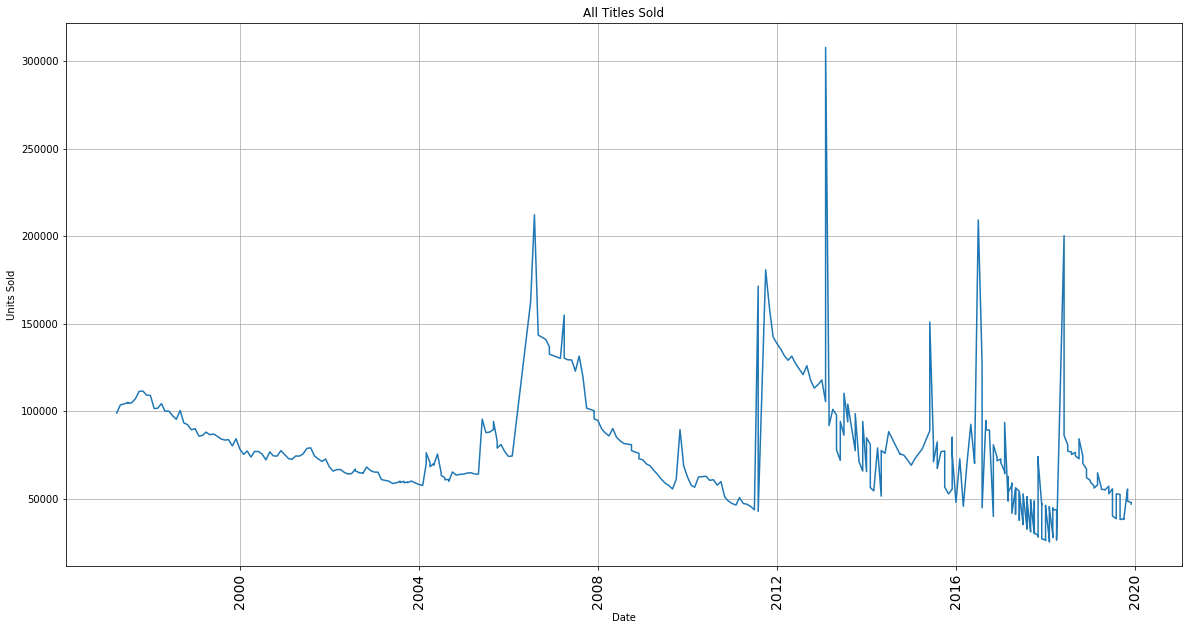

In [39]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Justice_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Justice League is the other cinematic universe we will be examining and while the movie side is not as successful as Marvel it does appear that sales for Justice League are better than Avengers comic book sales.  Some months have multiple titles released where one does significantly better than the other but unlike Avengers the relaunches have actually helped sliding sales.

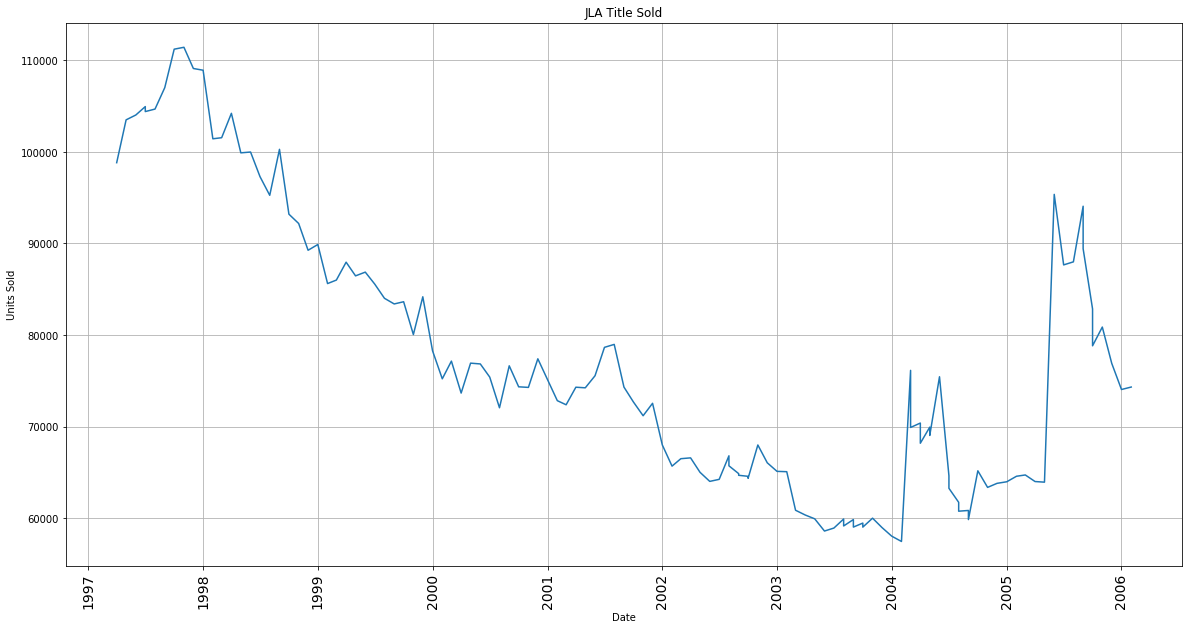

In [40]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('JLA Title Sold')
plt.grid(True)
plt.plot(Justice3)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## JLA is the Justice League released in the early years with early sales much higher and dropping off when Grant Morrison left the title.  Spikes in later sales show the that some writers can move the title but for the most part it continued downhill.

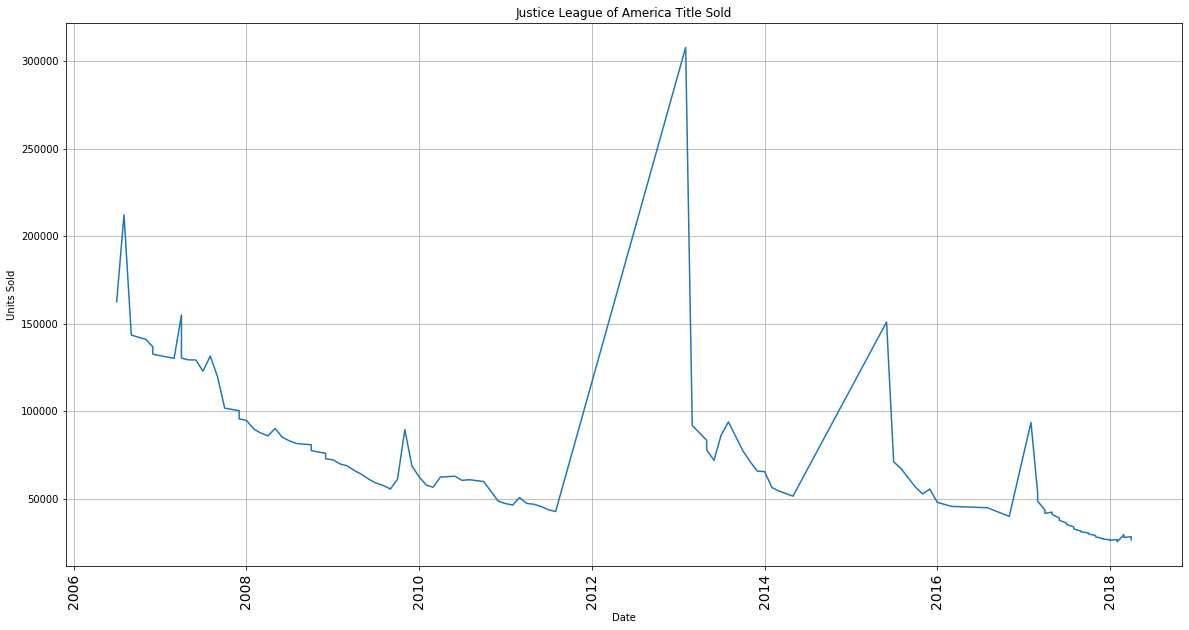

In [41]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Justice League of America Title Sold')
plt.grid(True)
plt.plot(Justice4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Justice League of America is the title that followed JLA and had huge initial sales with Brad Meltzer and had three separate relaunches when released at the same time as the Justice League title.  At that point it was the lesser Justice League title and has been pretty much discontinued.

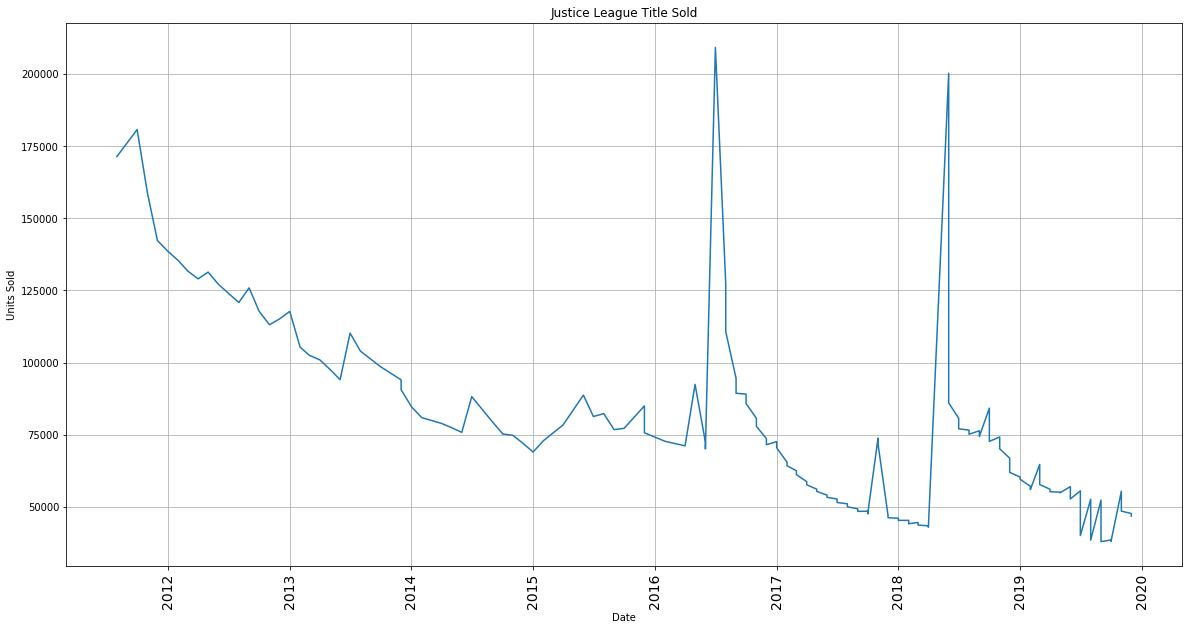

In [42]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Justice League Title Sold')
plt.grid(True)
plt.plot(Justice5)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Relaunched in 2011 Justice League has been the main title since and shown strong numbers.  The relaunches help boost sales for about six months before it goes back down again which is better than the Avengers has fared.

In [43]:
Justice_writers = Justice.groupby('Writer').filter(lambda x: x['Writer'].count()>9)
Justice_writers = Justice_writers.groupby(['Writer'])['Units_Sold'].mean()
Justice_writers

Writer
Brad Meltzer          142752.307692
Bryan Hitch            71846.000000
Christopher Priest     44862.300000
Dwayne McDuffie        82104.666667
Geoff Johns           102479.344262
Grant Morrison         94670.793103
James Robinson         56085.000000
Joe Kelly              63807.064516
Mark Waid              80621.217391
Scott Snyder           64290.379310
Steve Orlando          35402.586207
Name: Units_Sold, dtype: float64

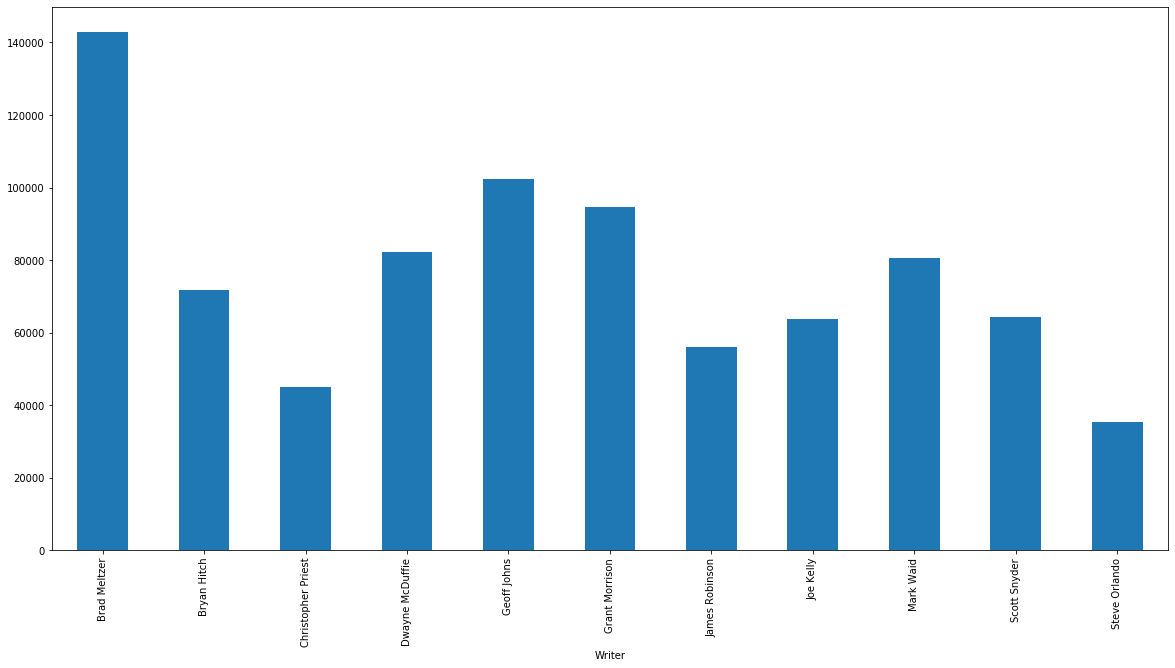

In [44]:
plt.figure(figsize=(20,10))
Justice_writers.plot(kind='bar')

## Only a few writers have been successful on the Justice League titles and we can tell from our previous graphs that there presence and leaving the title have had an effect on the sales.

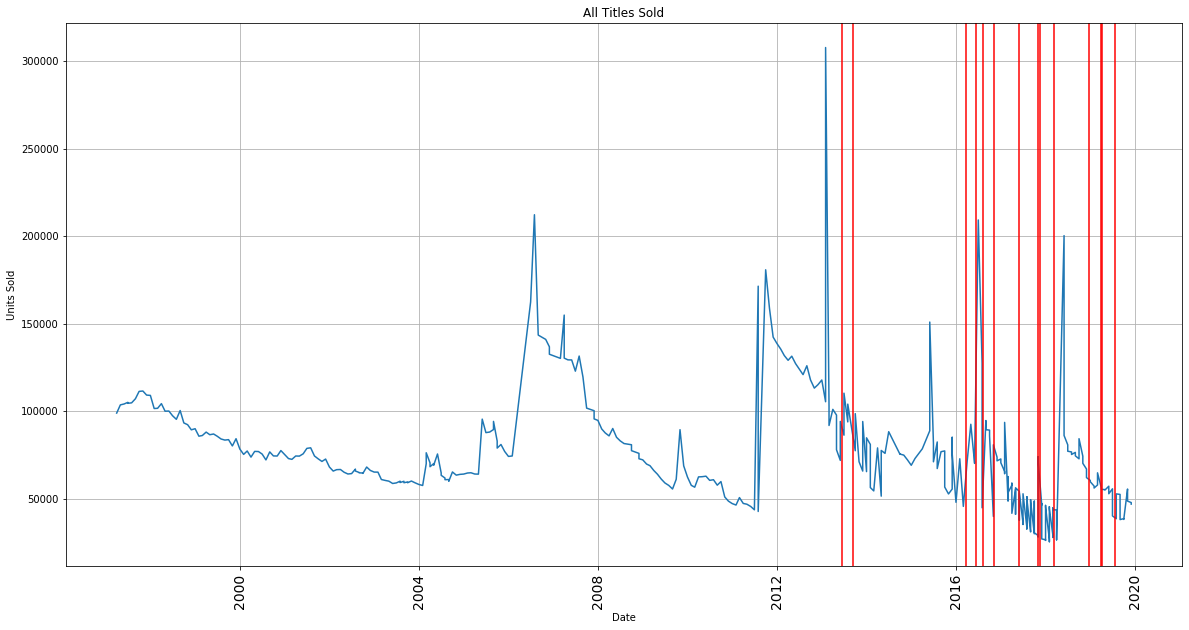

In [45]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Justice_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.axvline(pd.Timestamp('2013-06-13'),color='r')
plt.axvline(pd.Timestamp('2013-09-13'),color='r')
plt.axvline(pd.Timestamp('2016-03-25'),color='r')
plt.axvline(pd.Timestamp('2016-06-10'),color='r')
plt.axvline(pd.Timestamp('2016-08-05'),color='r')
plt.axvline(pd.Timestamp('2016-11-04'),color='r')
plt.axvline(pd.Timestamp('2017-06-02'),color='r')
plt.axvline(pd.Timestamp('2017-11-03'),color='r')
plt.axvline(pd.Timestamp('2017-11-17'),color='r')
plt.axvline(pd.Timestamp('2018-03-09'),color='r')
plt.axvline(pd.Timestamp('2018-12-21'),color='r')
plt.axvline(pd.Timestamp('2019-03-29'),color='r')
plt.axvline(pd.Timestamp('2019-04-05'),color='r')
plt.axvline(pd.Timestamp('2019-07-19'),color='r')
plt.show()

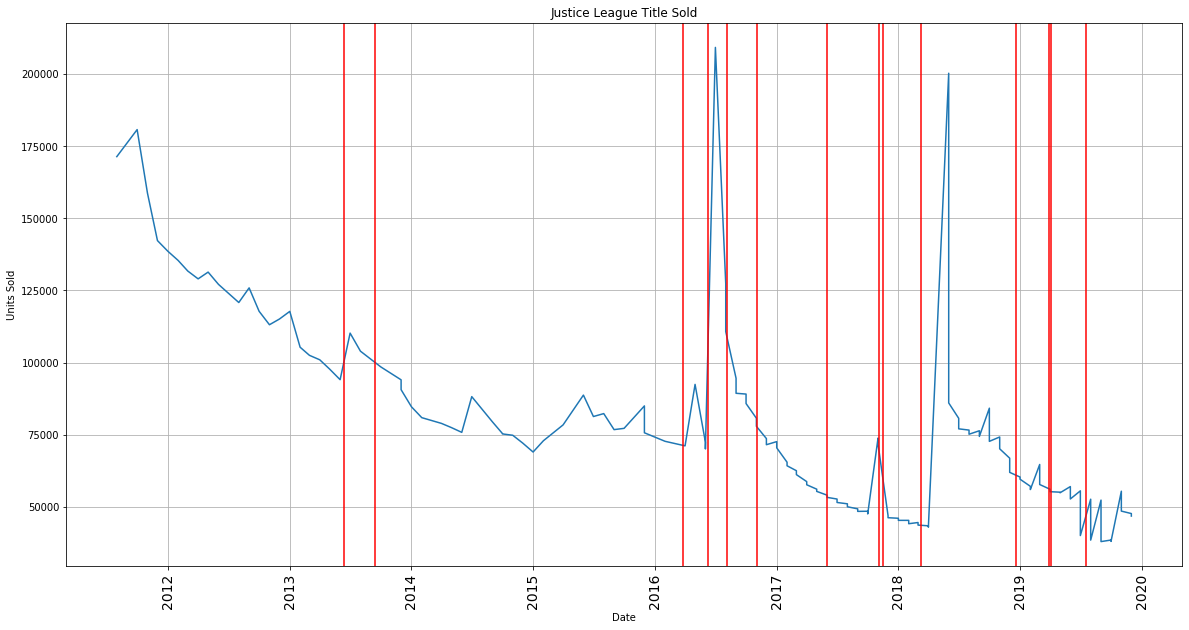

In [90]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Justice League Title Sold')
plt.grid(True)
plt.plot(Justice5)
plt.xticks(fontsize=14, rotation=90)
plt.axvline(pd.Timestamp('2013-06-13'),color='r')
plt.axvline(pd.Timestamp('2013-09-13'),color='r')
plt.axvline(pd.Timestamp('2016-03-25'),color='r')
plt.axvline(pd.Timestamp('2016-06-10'),color='r')
plt.axvline(pd.Timestamp('2016-08-05'),color='r')
plt.axvline(pd.Timestamp('2016-11-04'),color='r')
plt.axvline(pd.Timestamp('2017-06-02'),color='r')
plt.axvline(pd.Timestamp('2017-11-03'),color='r')
plt.axvline(pd.Timestamp('2017-11-17'),color='r')
plt.axvline(pd.Timestamp('2018-03-09'),color='r')
plt.axvline(pd.Timestamp('2018-12-21'),color='r')
plt.axvline(pd.Timestamp('2019-03-29'),color='r')
plt.axvline(pd.Timestamp('2019-04-05'),color='r')
plt.axvline(pd.Timestamp('2019-07-19'),color='r')
plt.show()

## Just like the Avengers we also see the effect of marketing for the movies have on comic book sales leading into the release in theaters.  High initial sales coming and lower sales coming out.

## Spider-Man

In [46]:
Spider = pd.read_csv("Spider_Final.csv")
Spider.head()

,File,Date,Rank,Comic-book_Title,Issue,Price,Publisher,Units_Sold,Writer,Rating,Movie_Title,Box_Office_Start,Box_Office_End,Worldwide_Box_Office,Metascore,User_Score
0,1997-04.csv,1997-04,34,Amazing Spider-Man,424,1.95,Marvel,79143,Tom DeFalco,NaN,Spider Man,5/3/2002,8/16/2002,825677927.0,73.0,8.6
1,1997-05.csv,1997-05,20,Amazing Spider-Man,-1,1.95,Marvel,74425,Tom DeFalco,NaN,Spider Man 2,6/30/2004,11/26/2004,795110670.0,83.0,8.6
2,1997-06.csv,1997-06,21,Amazing Spider-Man,425,2.99,Marvel,79804,Tom DeFalco,NaN,Spider Man 3,5/4/2007,8/17/2007,894860230.0,59.0,6.8
3,1997-07.csv,1997-07,26,Amazing Spider-Man,426,1.99,Marvel,71808,Tom DeFalco,NaN,Amazing Spider Man,7/2/2012,10/5/2012,757890267.0,66.0,7.0
4,1997-08.csv,1997-08,25,Amazing Spider-Man,427,1.99,Marvel,72365,Tom DeFalco,NaN,Amazing Spider Man 2,5/2/2014,8/8/2014,708996336.0,53.0,6.4


In [47]:
Spider['Date'] = pd.to_datetime(Spider['Date'], format="%Y/%m")

In [48]:
Spider2 = Spider[["Date", "Units_Sold"]]
Spider2.head()

,Date,Units_Sold
0,1997-04-01,79143
1,1997-05-01,74425
2,1997-06-01,79804
3,1997-07-01,71808
4,1997-08-01,72365


In [49]:
Spider_sorted = Spider2.sort_values(["Date"])
Spider_sorted.head()

,Date,Units_Sold
0,1997-04-01,79143
1,1997-05-01,74425
2,1997-06-01,79804
3,1997-07-01,71808
4,1997-08-01,72365


In [50]:
Spider_sorted.set_index("Date", inplace=True)
Spider_sorted.head()

,Units_Sold
Date,
1997-04-01,79143
1997-05-01,74425
1997-06-01,79804
1997-07-01,71808
1997-08-01,72365


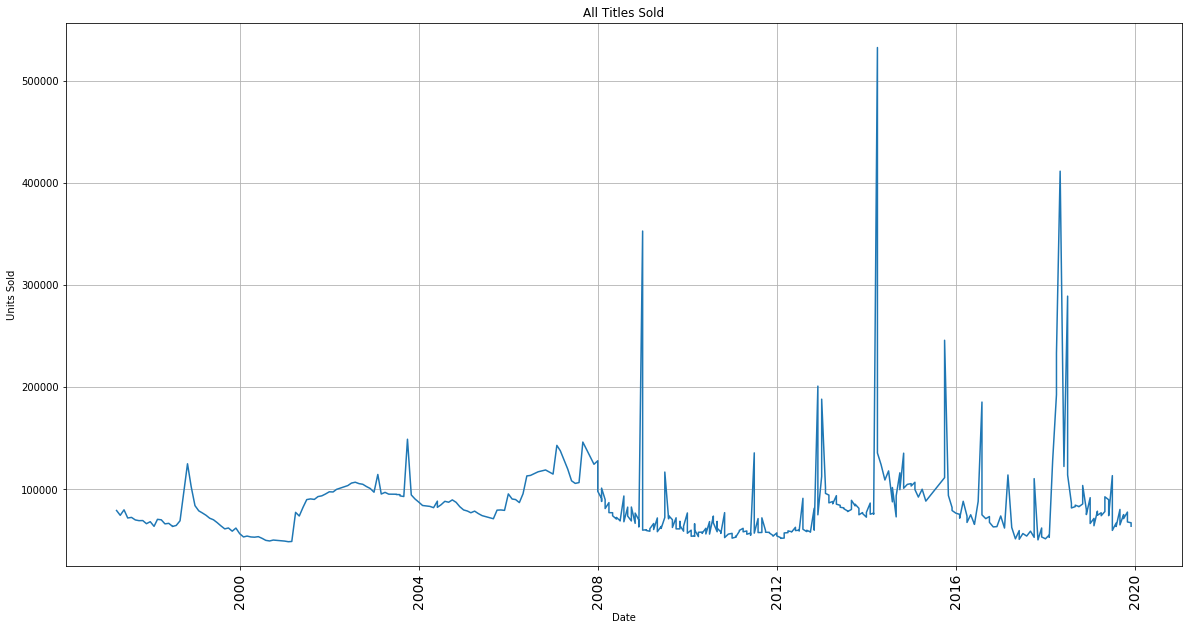

In [51]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Spider_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Spider-Man and X-Men are two franchise that resemble each other in that they both had a movie franchise in the early 2000s and later had another movies come out more recently.  Spider-Man really only has one ongoing title Amazing Spider-Man that replaced temporarily with Superior Spider-Man for about two years and then brough back again.  Also like the Avengers we have one writer who has dominated the number of titles written.  The sales during this time have stayed pretty consistent and had a couple of relaunches to help sales.  The downward trend observed in other titles in much less pronounced than the other franchises.

In [52]:
Spider_writers = Spider.groupby('Writer').filter(lambda x: x['Writer'].count()>9)
Spider_writers = Spider_writers.groupby(['Writer'])['Units_Sold'].mean()
Spider_writers

Writer
Dan Slott                 84966.241176
Howard Mackie             63538.392857
J. Michael Straczynski    95578.546667
Joe Kelly                 64459.285714
Marc Guggenheim           70200.437500
Mark Waid                 80018.705882
Nick Spencer              84755.527778
Tom DeFalco               69658.000000
Name: Units_Sold, dtype: float64

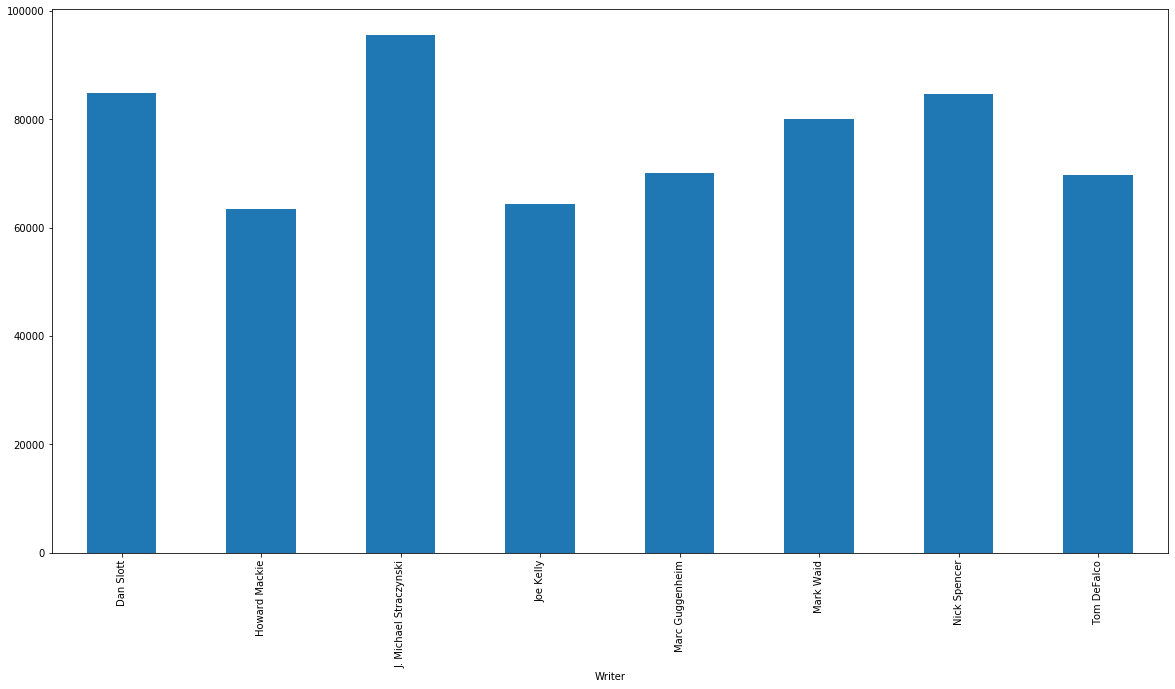

In [53]:
plt.figure(figsize=(20,10))
Spider_writers.plot(kind='bar')

## No surprise here with Dan Slott anchoring the title for the majority here with him being near the top and early writer J. Michael Straczynski being the top seller when comic book sales were higher.  Current writer Nick Spencer is pretty high as well.

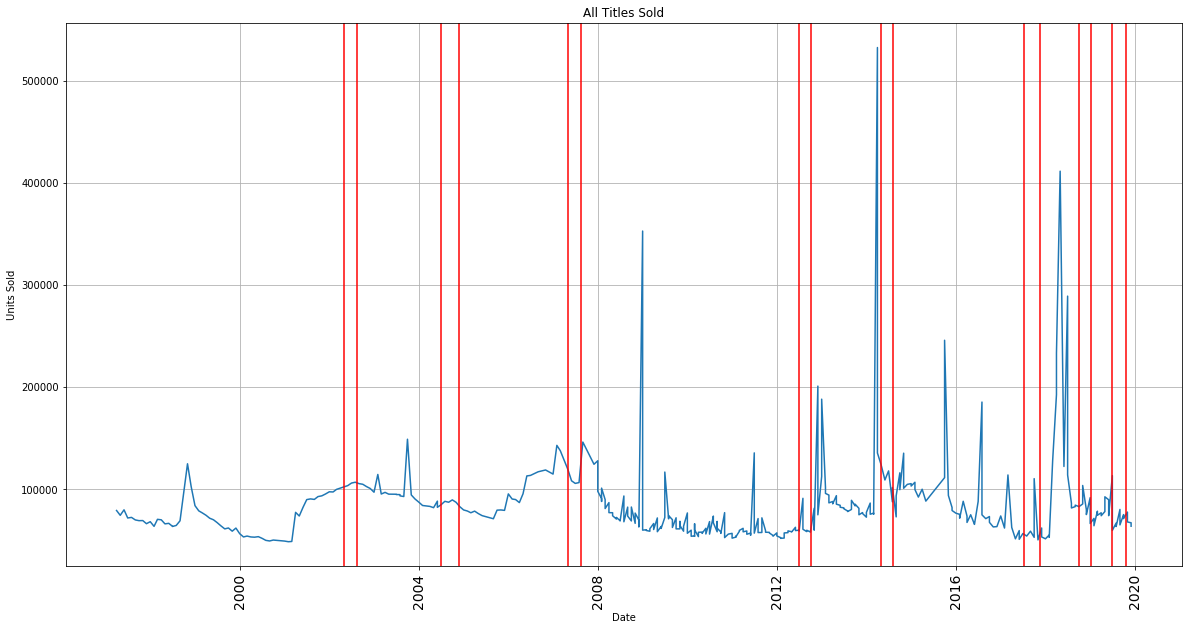

In [54]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(Spider_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.axvline(pd.Timestamp('2002-05-03'),color='r')
plt.axvline(pd.Timestamp('2002-08-16'),color='r')
plt.axvline(pd.Timestamp('2004-06-30'),color='r')
plt.axvline(pd.Timestamp('2004-11-26'),color='r')
plt.axvline(pd.Timestamp('2007-05-04'),color='r')
plt.axvline(pd.Timestamp('2007-08-17'),color='r')
plt.axvline(pd.Timestamp('2012-07-02'),color='r')
plt.axvline(pd.Timestamp('2012-10-05'),color='r')
plt.axvline(pd.Timestamp('2014-05-02'),color='r')
plt.axvline(pd.Timestamp('2014-08-08'),color='r')
plt.axvline(pd.Timestamp('2017-07-07'),color='r')
plt.axvline(pd.Timestamp('2017-11-17'),color='r')
plt.axvline(pd.Timestamp('2018-10-05'),color='r')
plt.axvline(pd.Timestamp('2019-01-11'),color='r')
plt.axvline(pd.Timestamp('2019-07-02'),color='r')
plt.axvline(pd.Timestamp('2019-10-18'),color='r')
plt.show()

## Once again we see the high initial lower final numbers for the Spider-Man movie runs with the original trilogy having higher numbers than the newer movies.

## X-Men

In [55]:
X = pd.read_csv("X_final.csv")
X.head()

,File,Date,Rank,Comic-book_Title,Issue,Price,Publisher,Units_Sold,Writer,Rating,Movie_Title,Box_Office_Start,Box_Office_End,Worldwide_Box_Office,Metascore,User_Score
0,2012-11.csv,2012-11,1.0,All New X-Men,1,3.99,Marvel,181693,Brian Michael Bendis,8.1,X-Men,7/14/2000,11/17/2000,"$296,872,367.00",64.0,7.8
1,2012-11.csv,2012-11,11.0,All New X-Men,2,3.99,Marvel,96436,Brian Michael Bendis,8.5,X-Men 2,5/2/2003,9/19/2003,"$406,875,536.00",68.0,8.7
2,2012-12.csv,2012-12,9.0,All New X-Men,3,3.99,Marvel,83798,Brian Michael Bendis,7.6,X-Men Last Stand,5/26/2006,9/22/2006,"$459,260,946.00",58.0,6.0
3,2012-12.csv,2012-12,11.0,All New X-Men,4,3.99,Marvel,80665,Brian Michael Bendis,8.2,X-Men Origins of Wolverine,5/1/2009,9/25/2009,"$374,825,760.00",40.0,5.3
4,2013-01.csv,2013-01,13.0,All New X-Men,6,3.99,Marvel,80195,Brian Michael Bendis,8.7,X-Men First Class,6/3/2011,9/23/2011,"$355,408,305.00",65.0,7.8


In [56]:
X['Date'] = pd.to_datetime(X['Date'], format="%Y/%m")

In [57]:
X2 = Spider[["Date", "Units_Sold"]]
X2.head()

,Date,Units_Sold
0,1997-04-01,79143
1,1997-05-01,74425
2,1997-06-01,79804
3,1997-07-01,71808
4,1997-08-01,72365


In [58]:
X_sorted = X2.sort_values(["Date"])
X_sorted.head()

,Date,Units_Sold
0,1997-04-01,79143
1,1997-05-01,74425
2,1997-06-01,79804
3,1997-07-01,71808
4,1997-08-01,72365


In [59]:
X_sorted.set_index("Date", inplace=True)
X_sorted.head()

,Units_Sold
Date,
1997-04-01,79143
1997-05-01,74425
1997-06-01,79804
1997-07-01,71808
1997-08-01,72365


In [60]:
X3 = X[X['Comic-book_Title'] == "All New X-Men"]
X3 = X3[["Date", "Units_Sold"]]
X3.set_index("Date", inplace=True)
X3.head()

,Units_Sold
Date,
2012-11-01,181693
2012-11-01,96436
2012-12-01,83798
2012-12-01,80665
2013-01-01,80195


In [61]:
X4 = X[X['Comic-book_Title'] == "Amazing X-Men"]
X4 = X4[["Date", "Units_Sold"]]
X4.set_index("Date", inplace=True)
X4.head()

,Units_Sold
Date,
2013-11-01,112337
2013-12-01,60870
2014-01-01,51431
2014-02-01,48161
2014-03-01,46242


In [62]:
X5 = X[X['Comic-book_Title'] == "Astonishing X-Men"]
X5 = X5[["Date", "Units_Sold"]]
X5.set_index("Date", inplace=True)
X5.head()

,Units_Sold
Date,
2004-05-01,209289
2004-06-01,133789
2004-07-01,129369
2004-08-01,145546
2004-09-01,131544


In [63]:
X6 = X[X['Comic-book_Title'] == "Extraordinary X-Men"]
X6 = X6[["Date", "Units_Sold"]]
X6.set_index("Date", inplace=True)
X6.head()

,Units_Sold
Date,
2015-11-01,133716
2015-11-01,64595
2015-12-01,56100
2015-12-01,49079
2016-01-01,47572


In [64]:
X7 = X[X['Comic-book_Title'] == "New X-Men"]
X7 = X7[["Date", "Units_Sold"]]
X7.set_index("Date", inplace=True)
X7.head()

,Units_Sold
Date,
2001-05-01,144835
2001-06-01,142308
2001-07-01,136249
2001-08-01,136919
2001-09-01,127670


In [65]:
X8 = X[X['Comic-book_Title'] == "Uncanny X-Men"]
X8 = X8[["Date", "Units_Sold"]]
X8.set_index("Date", inplace=True)
X8.head()

,Units_Sold
Date,
1997-04-01,179378
1997-05-01,162890
1997-06-01,173453
1997-07-01,165832
1997-08-01,163028


In [66]:
X9 = X[X['Comic-book_Title'] == "Wolverine And X-Men"]
X9 = X9[["Date", "Units_Sold"]]
X9.set_index("Date", inplace=True)
X9.head()

,Units_Sold
Date,
2011-10-01,95855
2011-11-01,83356
2011-12-01,58438
2012-01-01,59530
2012-02-01,55788


In [67]:
X10 = X[X['Comic-book_Title'] == "X-Men Blue"]
X10 = X10[["Date", "Units_Sold"]]
X10.set_index("Date", inplace=True)
X10.head()

,Units_Sold
Date,
2017-04-01,108839
2017-04-01,54074
2017-05-01,48354
2017-05-01,44576
2017-06-01,50374


In [68]:
X11 = X[X['Comic-book_Title'] == "X-Men Gold"]
X11 = X11[["Date", "Units_Sold"]]
X11.set_index("Date", inplace=True)
X11.head()

,Units_Sold
Date,
2017-04-01,114332
2017-04-01,62283
2017-05-01,57553
2017-05-01,52710
2017-06-01,54720


In [69]:
X12 = X[X['Comic-book_Title'] == "X-Men Legacy"]
X12 = X12[["Date", "Units_Sold"]]
X12.set_index("Date", inplace=True)
X12.head()

,Units_Sold
Date,
2008-02-01,88076
2008-03-01,82219
2008-04-01,77425
2008-05-01,79795
2008-05-01,74011


In [70]:
X13 = X[X['Comic-book_Title'] == "X-Men Red"]
X13 = X13[["Date", "Units_Sold"]]
X13.set_index("Date", inplace=True)
X13.head()

,Units_Sold
Date,
2018-02-01,98468
2018-03-01,49084
2018-04-01,56531
2018-05-01,44607
2018-06-01,38372


In [71]:
X14 = X[X['Comic-book_Title'] == "X-Men"]
X14 = X14[["Date", "Units_Sold"]]
X14.set_index("Date", inplace=True)
X14.head()

,Units_Sold
Date,
1997-04-01,177828
1997-05-01,160365
1997-06-01,169677
1997-07-01,162451
1997-08-01,160043


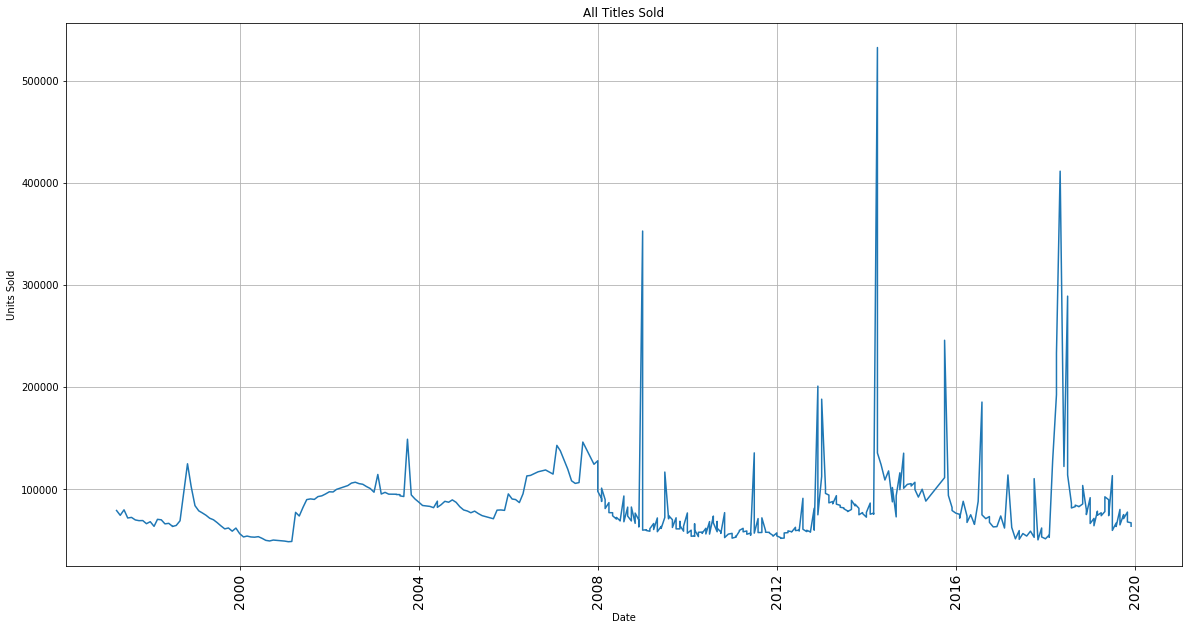

In [72]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(X_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## X-Men by far has the most titles to keep track of and also has a signicantly number of movies to their franchise as well.  Like Spider-Man the sales of all the titles show that sales have also stayed pretty consistent while X-Men has more spikes in the sales due to being relaunched more.  

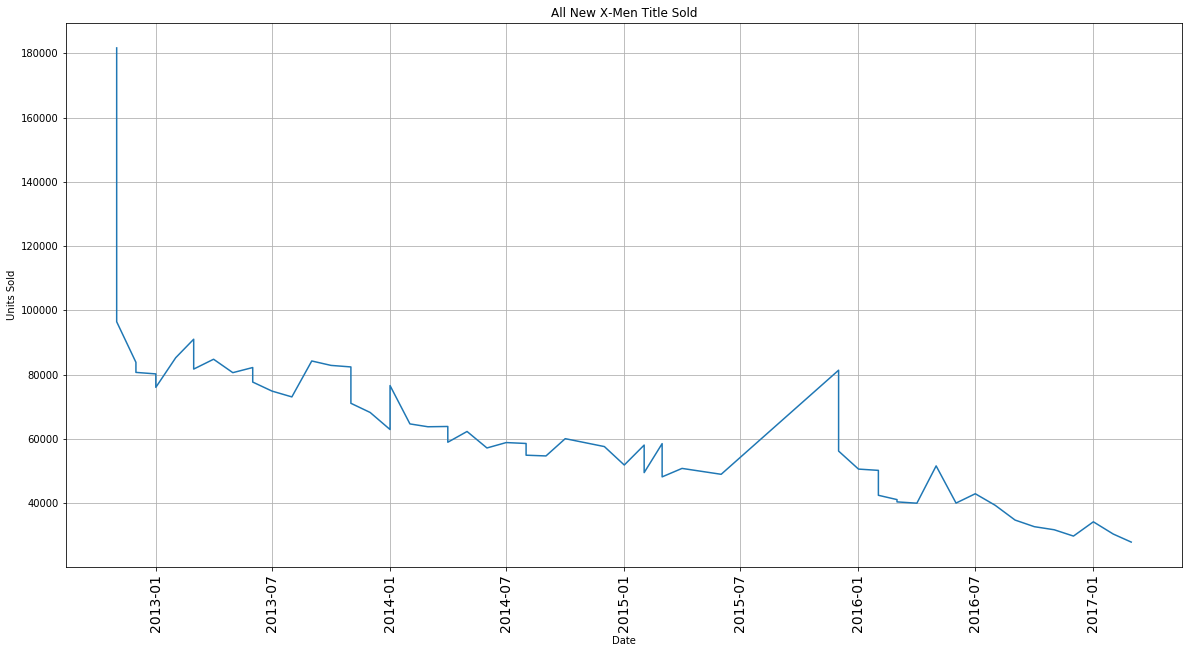

In [73]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All New X-Men Title Sold')
plt.grid(True)
plt.plot(X3)
plt.xticks(fontsize=14, rotation=90)
plt.show()

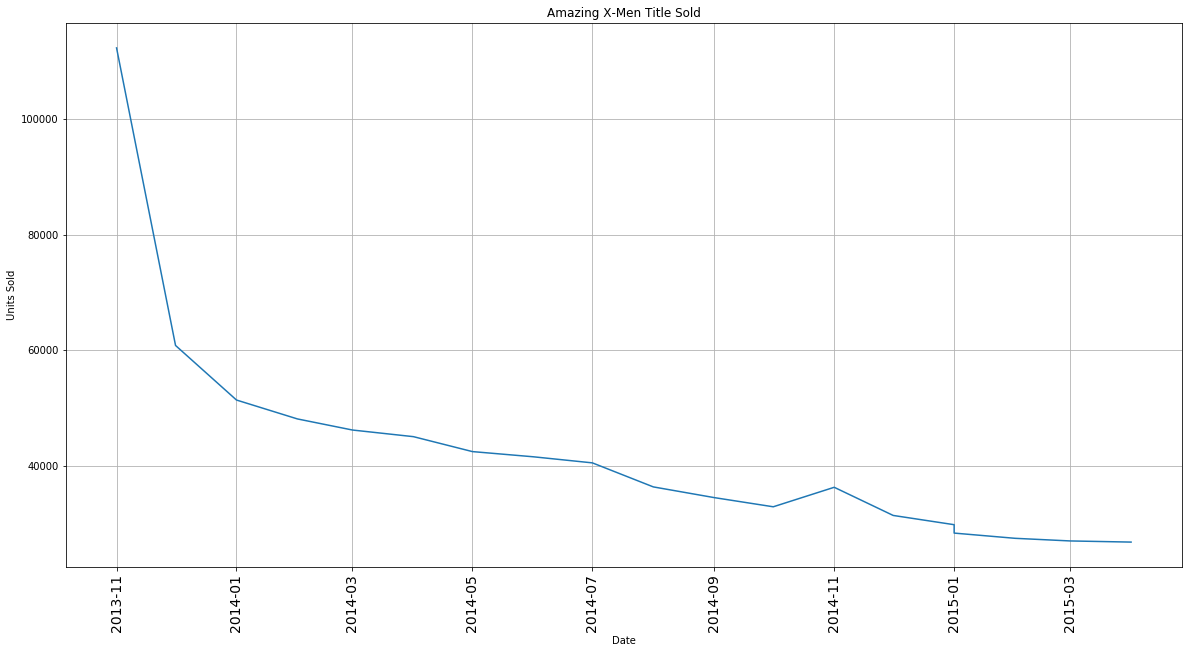

In [74]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Amazing X-Men Title Sold')
plt.grid(True)
plt.plot(X4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

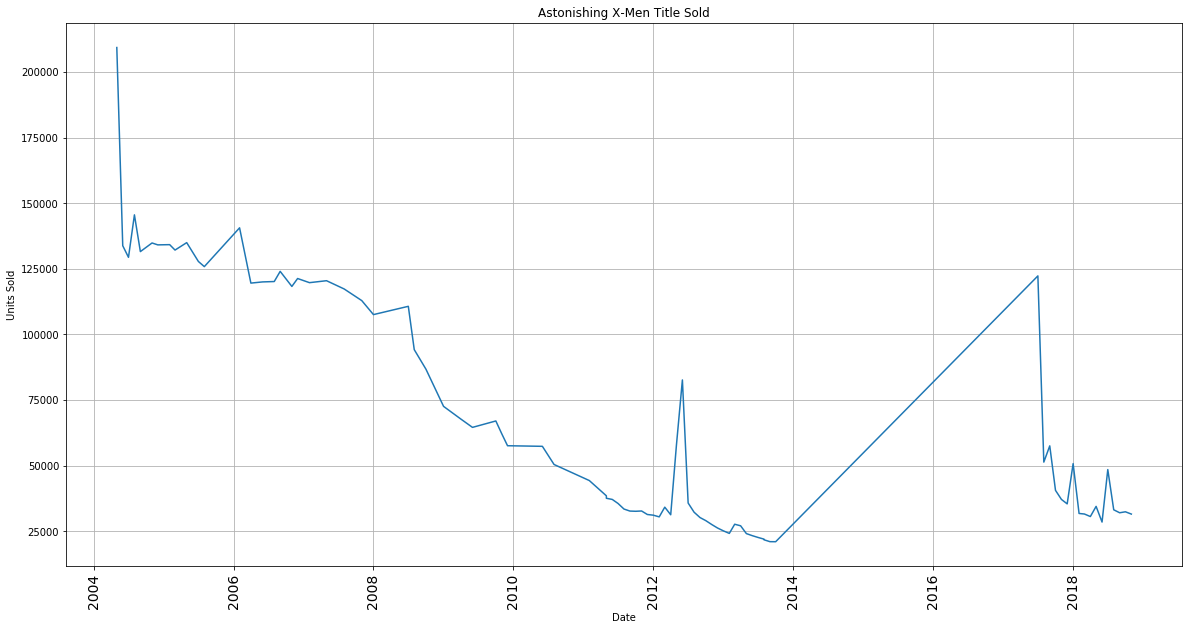

In [75]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Astonishing X-Men Title Sold')
plt.grid(True)
plt.plot(X5)
plt.xticks(fontsize=14, rotation=90)
plt.show()

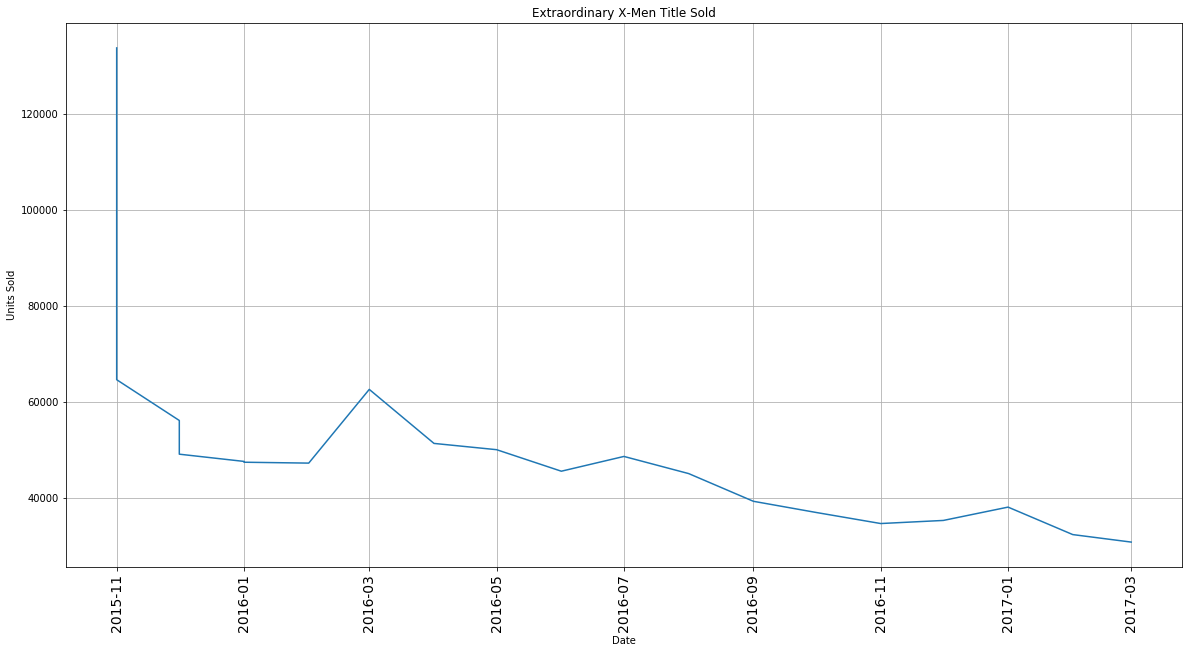

In [76]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Extraordinary X-Men Title Sold')
plt.grid(True)
plt.plot(X6)
plt.xticks(fontsize=14, rotation=90)
plt.show()

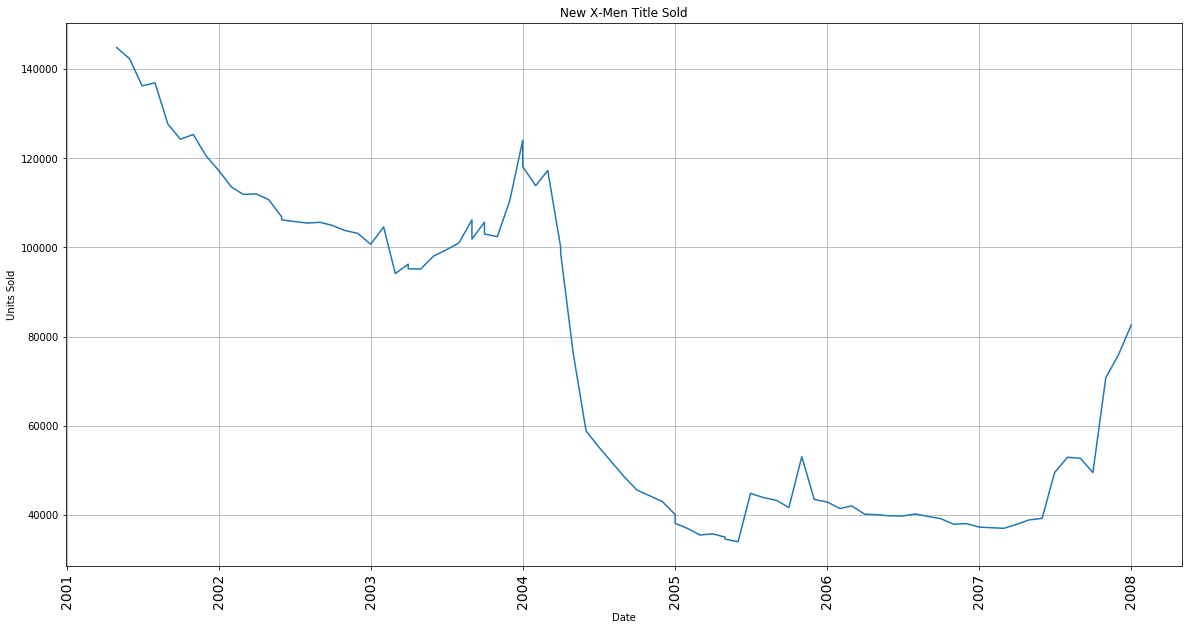

In [77]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('New X-Men Title Sold')
plt.grid(True)
plt.plot(X7)
plt.xticks(fontsize=14, rotation=90)
plt.show()

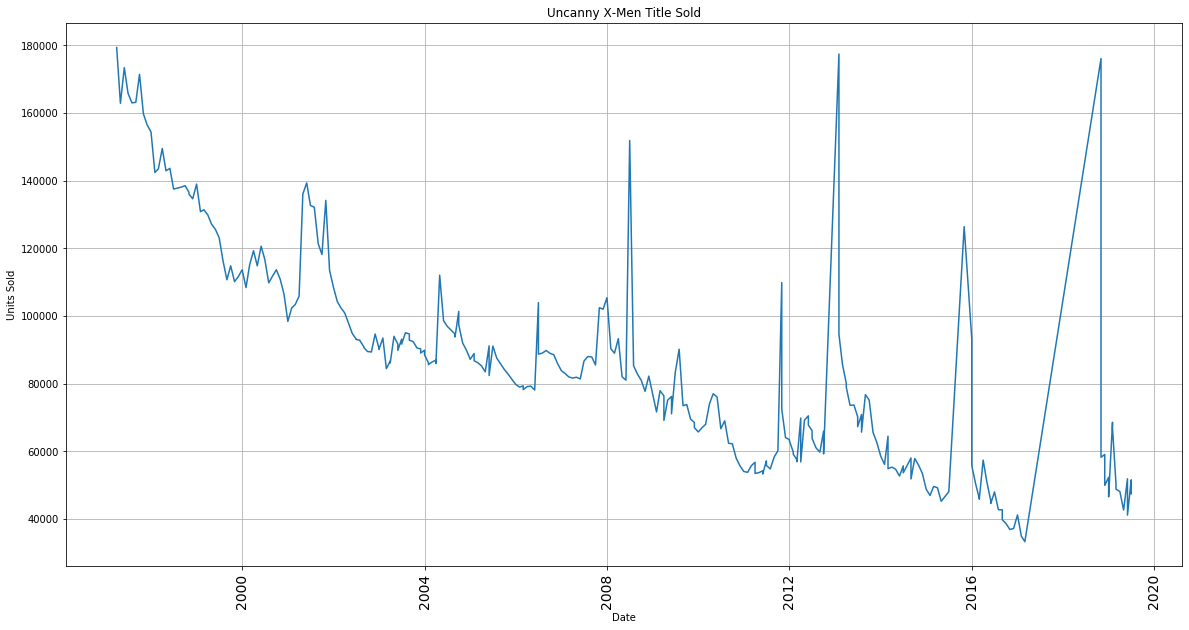

In [78]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Uncanny X-Men Title Sold')
plt.grid(True)
plt.plot(X8)
plt.xticks(fontsize=14, rotation=90)
plt.show()

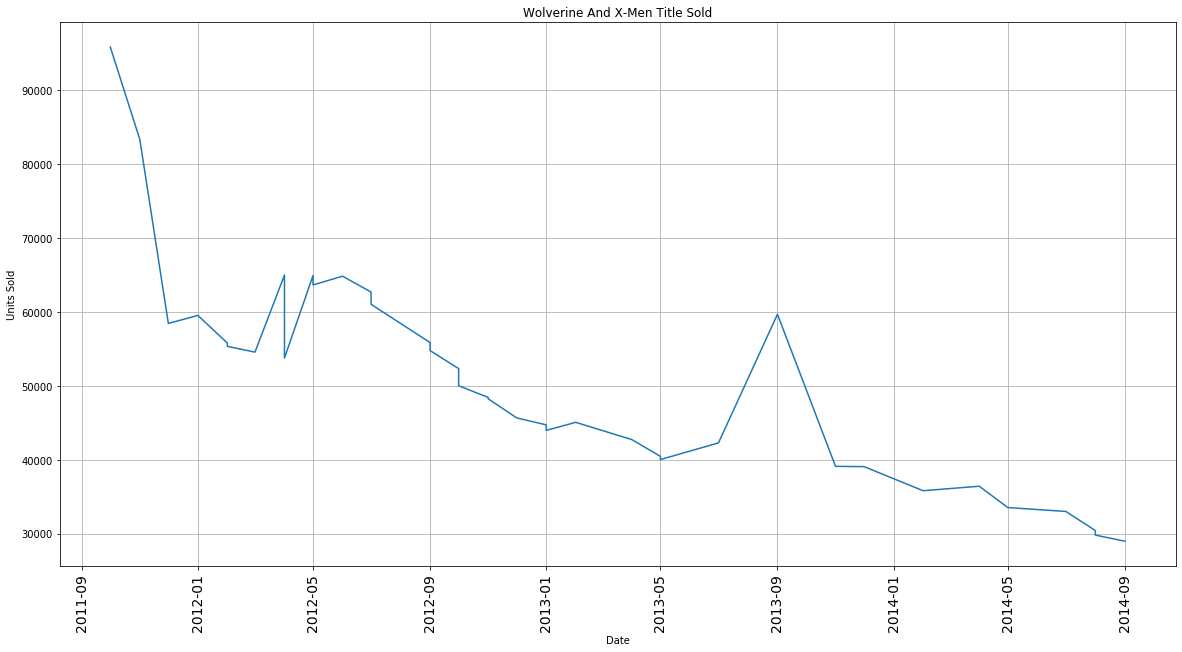

In [79]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Wolverine And X-Men Title Sold')
plt.grid(True)
plt.plot(X9)
plt.xticks(fontsize=14, rotation=90)
plt.show()

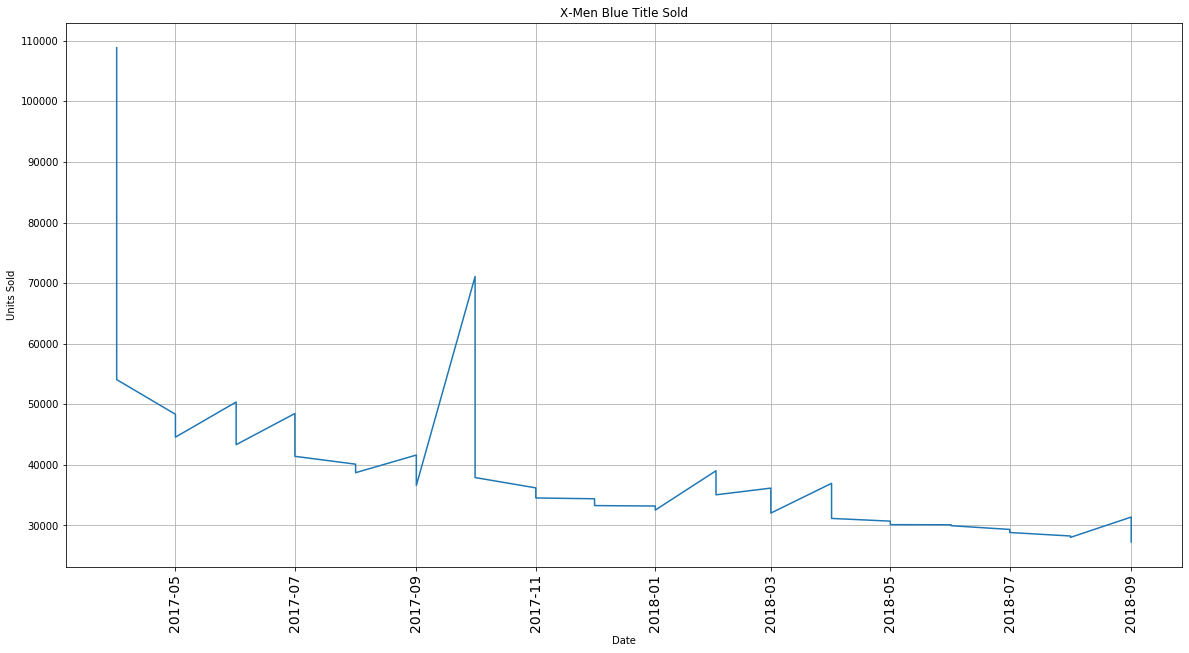

In [80]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('X-Men Blue Title Sold')
plt.grid(True)
plt.plot(X10)
plt.xticks(fontsize=14, rotation=90)
plt.show()

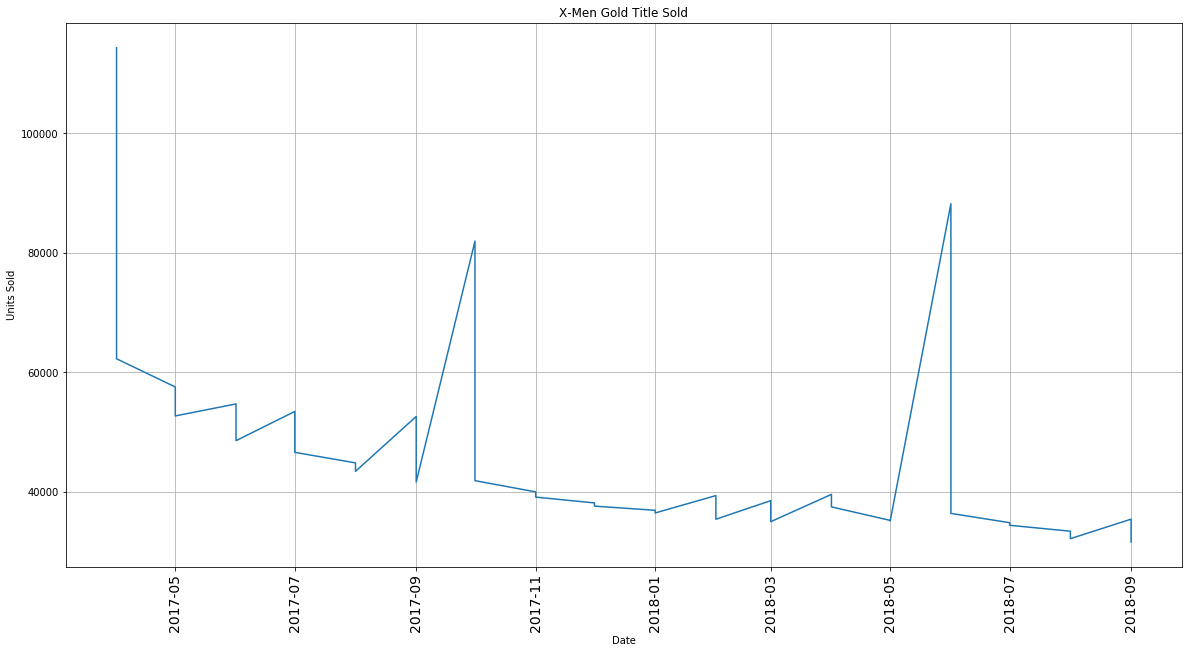

In [81]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('X-Men Gold Title Sold')
plt.grid(True)
plt.plot(X11)
plt.xticks(fontsize=14, rotation=90)
plt.show()

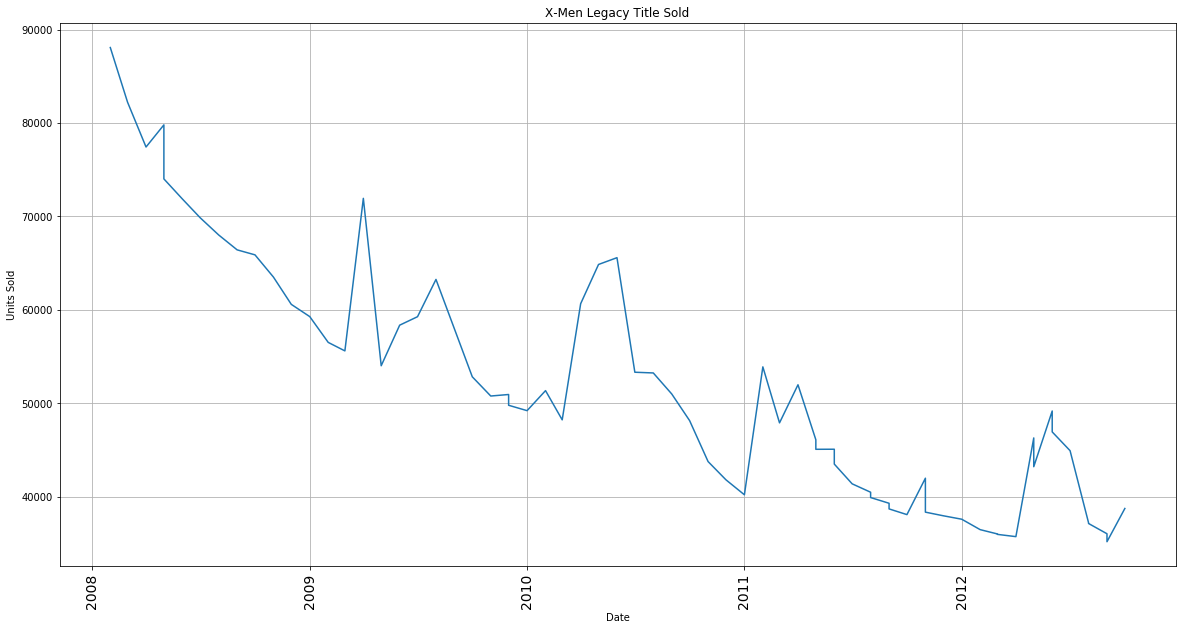

In [82]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('X-Men Legacy Title Sold')
plt.grid(True)
plt.plot(X12)
plt.xticks(fontsize=14, rotation=90)
plt.show()

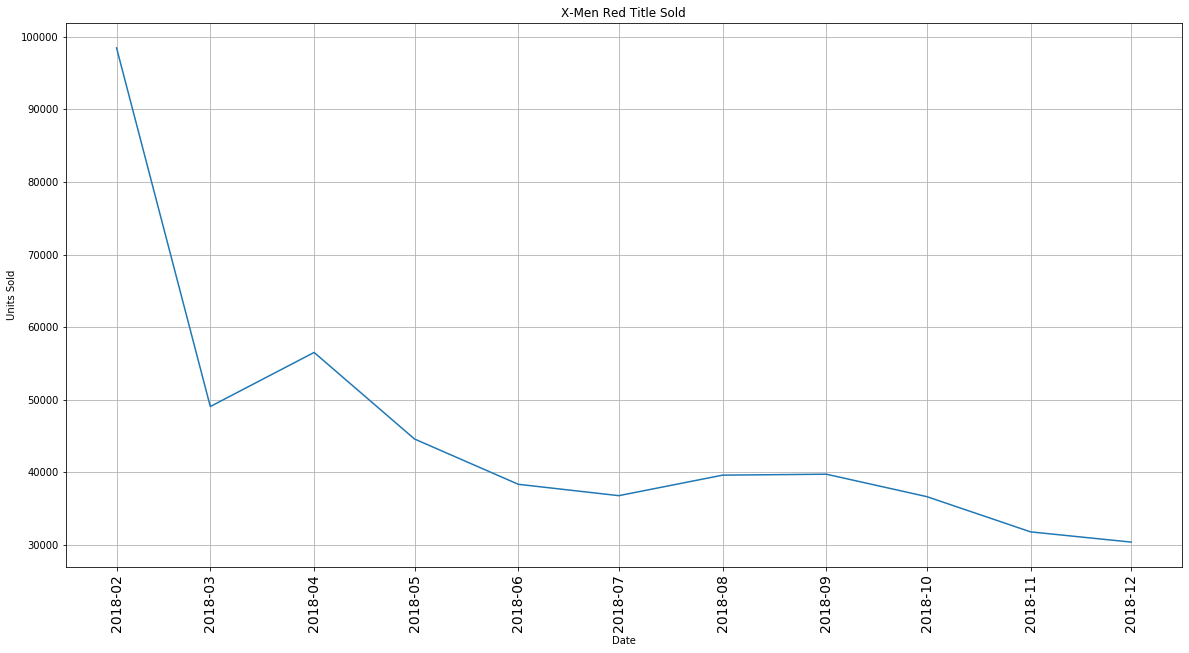

In [83]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('X-Men Red Title Sold')
plt.grid(True)
plt.plot(X13)
plt.xticks(fontsize=14, rotation=90)
plt.show()

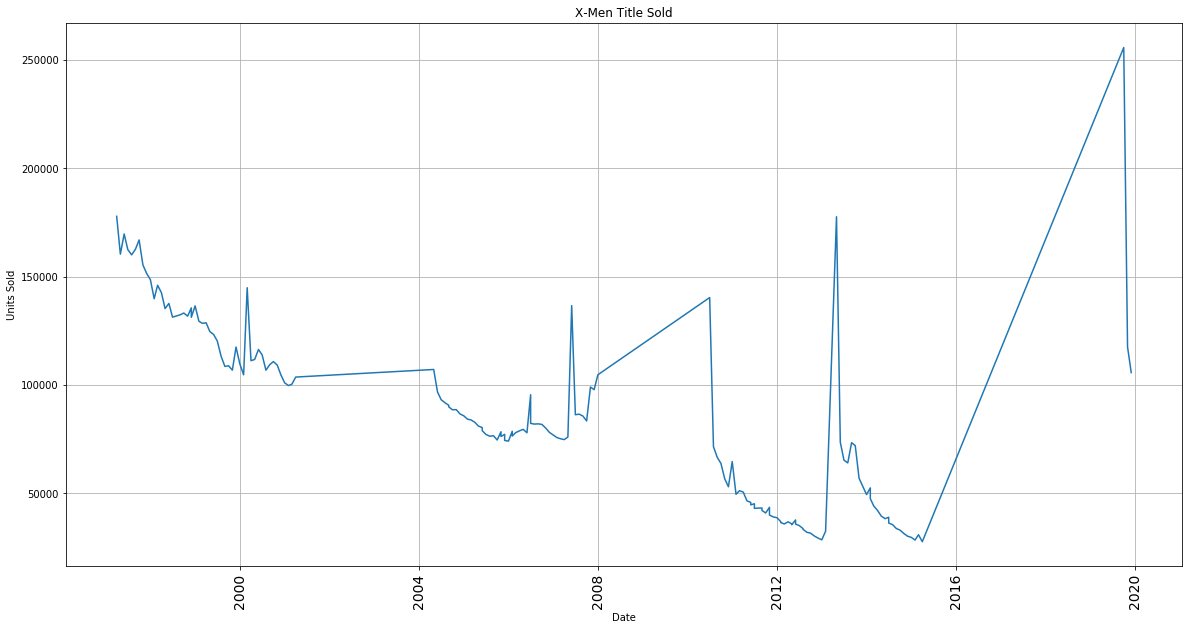

In [84]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('X-Men Title Sold')
plt.grid(True)
plt.plot(X14)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## What we see we analyzing the individual titles is that short runs with quick relaunches are what is keeping the X-Men titles selling so high for a long period of time.  Titles that have a huge drop off are either cancelled quickly or relaunched with a new writer.

In [85]:
X_writers = X.groupby('Writer').filter(lambda x: x['Writer'].count()>9)
X_writers = X_writers.groupby(['Writer'])['Units_Sold'].mean()
X_writers

Writer
Alan Davis              119136.700000
Brian Michael Bendis     69552.857143
Brian Wood               51832.160000
Charles Soule            46006.916667
Chris Claremont          98595.040000
Christopher Yost         34982.100000
Chuck Austen             91230.372093
Craig Kyle               44536.875000
Cullen Bunn              41813.745455
Dennis Hopeless          41929.947368
Ed Brubaker              91352.153846
Grant Morrison          111184.268293
Jason Aaron              52522.770833
Jason Latour             33695.833333
Jeff Lemire              49801.650000
Joe Casey               114805.470588
Joe Kelly               141272.533333
Joss Whedon             129798.208333
Kieron Gillen            62289.903226
Marjorie Liu             30822.857143
Matt Fraction            71614.545455
Matthew Rosenberg        53774.703704
Mike Carey               86572.666667
Nunzio Defilippis        41651.764706
Peter Milligan           78716.476190
Scott Lobdell           142237.761905
Steve

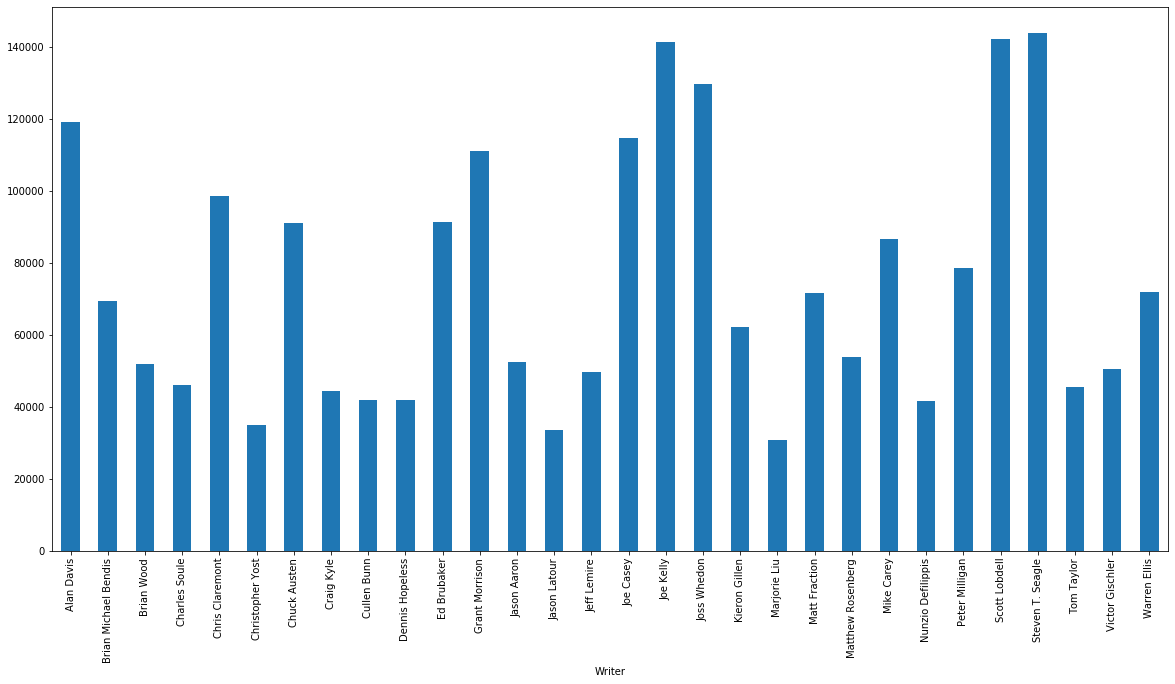

In [86]:
plt.figure(figsize=(20,10))
X_writers.plot(kind='bar')

## Earlier writers seem to have the most success when sales were higher but current writer Jonathan Hickman seems to be breaking the trend with huge numbers in the most recent relaunch.

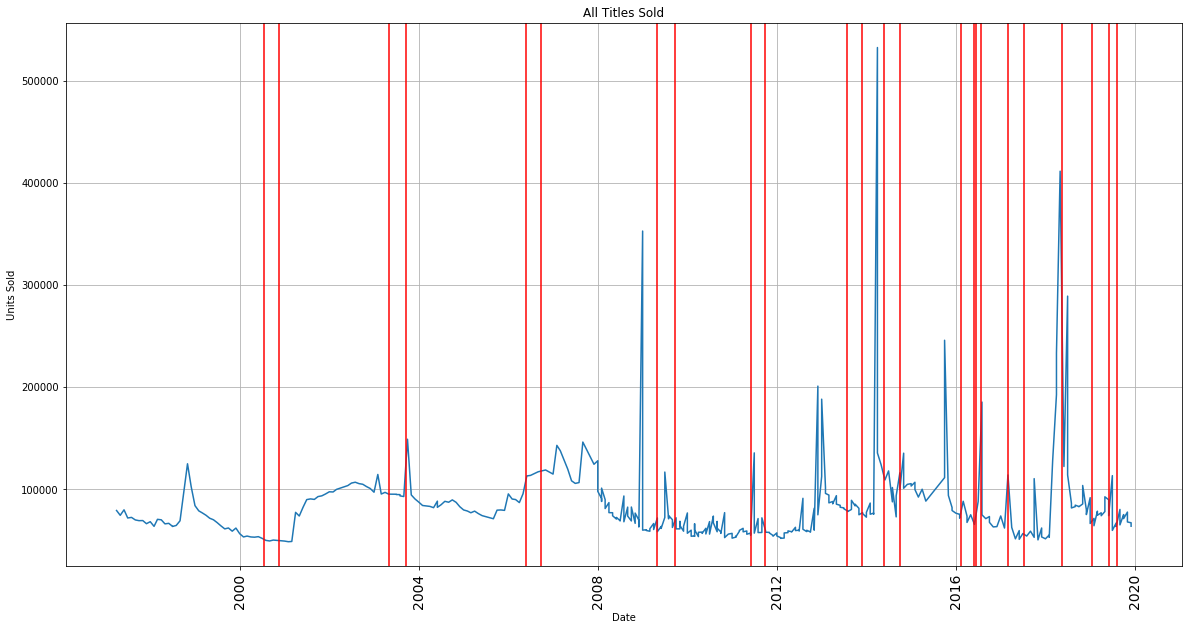

In [87]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('All Titles Sold')
plt.grid(True)
plt.plot(X_sorted)
plt.xticks(fontsize=14, rotation=90)
plt.axvline(pd.Timestamp('2000-07-14'),color='r')
plt.axvline(pd.Timestamp('2000-11-17'),color='r')
plt.axvline(pd.Timestamp('2003-05-02'),color='r')
plt.axvline(pd.Timestamp('2003-09-19'),color='r')
plt.axvline(pd.Timestamp('2006-05-26'),color='r')
plt.axvline(pd.Timestamp('2006-09-22'),color='r')
plt.axvline(pd.Timestamp('2009-05-01'),color='r')
plt.axvline(pd.Timestamp('2009-09-25'),color='r')
plt.axvline(pd.Timestamp('2011-06-03'),color='r')
plt.axvline(pd.Timestamp('2011-09-23'),color='r')
plt.axvline(pd.Timestamp('2013-07-26'),color='r')
plt.axvline(pd.Timestamp('2013-11-29'),color='r')
plt.axvline(pd.Timestamp('2014-05-23'),color='r')
plt.axvline(pd.Timestamp('2014-10-03'),color='r')
plt.axvline(pd.Timestamp('2016-02-12'),color='r')
plt.axvline(pd.Timestamp('2016-06-10'),color='r')
plt.axvline(pd.Timestamp('2016-05-27'),color='r')
plt.axvline(pd.Timestamp('2016-07-22'),color='r')
plt.axvline(pd.Timestamp('2017-03-03'),color='r')
plt.axvline(pd.Timestamp('2017-07-07'),color='r')
plt.axvline(pd.Timestamp('2018-05-18'),color='r')
plt.axvline(pd.Timestamp('2019-01-18'),color='r')
plt.axvline(pd.Timestamp('2019-06-07'),color='r')
plt.axvline(pd.Timestamp('2019-08-09'),color='r')
plt.show()

## Probably the most pronounced trend for movies is with the X-Men titles with the sales around the start of the theatrical run being more pronounced.  

## Conclusions

## Based on this information we can now formulate a hypothesis centering around the effect of having specific writers on titles, relaunching the title on a frequent basis, and movies being released during that time.  While movies being released does not seem to increase overall sales of the franchise to the point where it turns a downward into a positive one it does seem that the marketing for film leading up to the release is higher in the leadup versus the end of the run.  The biggest effect on sales has to do with a comic book title being relaunched and the strength of the title sustaining sales over a period of time has to do with the quality of writing.  Relaunched titles will pretty much always have a high peak but if the writer is not well recieved then the title will have a huge dropoff.